#  Project 3 - Web APIs & Classification
-------------
-------------

## Executive Summary

Like any other country, Singapore is also having an increasing depression rate among people. Therefore, in this classification problem, I will be trying to find the common and distinct words used by people who has anxiety or depression. 

This is a binary classification problem.

I will explore the data and train/test multiple classifier models on the collected data for best performance.

The project concludes with recommendations on the best performing classifier model.

In this project, I will be :
1. Using Reddit's API, to collect posts from two subreddits (Depression and anxiety).
2. I'll then use NatutalLanguageProcessing (NLP) to train a classifier to predict which subreddit a given post came from. <br>Thus helping to understand the relationship between the words used and the sentiments.<br>This will further help in understanding that the given person suffers from anxiety or depression.

### Contents:
- [Data Cleaning](#Data-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Exploratory Visualizations](#Exploratory-Visualizations)
- [Pre-processing](#Pre-processing)
- [Modeling](#Modeling)
- [Conclusion](#Conclusion)
- [Recommendations](#Recommendations)

### The Dataset:
We will be collecting our data by web scraping two Reddit API's (https://www.reddit.com/).<br>
The two API's I have used in this project are:<br>
1. Anxiety (https://www.reddit.com/r/Anxiety)
2. Depression (https://www.reddit.com/r/depression)

# Problem Statement 

To build a classifier model, to predict that the given post belongs to which subreddit: (Depression or Anxiety).
<br>And to identify the common and distinct words which will help in predicting the subreddit correctly.

This model will also help in detecting whether a person has depression or it is anxiety.

For this project, I will be using below vectorizers (NLP):
1. Count Vectorizer
2. Tf-tdf Vectorizer

The classifier models used are:
1. Naive Bayes
2. Logistic Regression

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from bs4 import BeautifulSoup
import re

# Import Tokenizer
from nltk.tokenize import RegexpTokenizer
# Import stopwords.
from nltk.corpus import stopwords
# Import lemmatizer.
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

#from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,confusion_matrix, classification_report


#!pip install vaderSentiment
# import SentimentIntensityAnalyzer class 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

#!pip install matplotlib-venn
from matplotlib_venn import venn2

# Import our model!
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


/Users/priya/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# To see all columns of dataframe inside Jupyter notebook 
pd.set_option('display.max_columns', 150)

# Suppress the future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

**Read the data into pandas dataframe**

In [3]:
# Import the data for anxiety and depression subreddit
anxiety = pd.read_csv('../data/anxiety_data.csv')
depression = pd.read_csv('../data/depression_data.csv')

In [4]:
# Quick check on the Anxiety data
anxiety.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,subreddit_name_prefixed,hidden,pwls,link_flair_css_class,downs,thumbnail_height,hide_score,name,quarantine,link_flair_text_color,author_flair_background_color,subreddit_type,ups,total_awards_received,media_embed,thumbnail_width,author_flair_template_id,is_original_content,user_reports,secure_media,is_reddit_media_domain,is_meta,category,secure_media_embed,link_flair_text,can_mod_post,score,approved_by,author_premium,thumbnail,edited,author_flair_css_class,author_flair_richtext,gildings,content_categories,is_self,mod_note,created,link_flair_type,wls,removed_by_category,banned_by,author_flair_type,domain,allow_live_comments,selftext_html,likes,suggested_sort,banned_at_utc,view_count,archived,no_follow,is_crosspostable,pinned,over_18,all_awardings,awarders,media_only,can_gild,spoiler,locked,author_flair_text,visited,removed_by,num_reports,distinguished,subreddit_id,mod_reason_by,removal_reason,link_flair_background_color,id,is_robot_indexable,report_reasons,author,discussion_type,num_comments,send_replies,whitelist_status,contest_mode,mod_reports,author_patreon_flair,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,link_flair_template_id,post_hint,preview
0,NaN,Anxiety,"""Happy Sunday! What does your week look like?\...",t2_6l4z3,False,NaN,0,False,"Sunday General Chat Thread - March 01, 2020",[],r/Anxiety,False,1,NaN,0,NaN,False,t3_fbt8eq,False,dark,NaN,public,11,0,{},NaN,NaN,False,[],NaN,False,False,NaN,{},NaN,False,11,NaN,True,self,False,NaN,[],{},NaN,True,NaN,1.583094e+09,text,1,NaN,NaN,text,self.Anxiety,False,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",NaN,NaN,NaN,NaN,False,True,False,False,False,[],[],False,False,False,False,Paranoid Robot,False,NaN,NaN,moderator,t5_2qmij,NaN,NaN,NaN,fbt8eq,True,NaN,AutoModerator,NaN,25,False,house_only,False,[],False,dark,/r/Anxiety/comments/fbt8eq/sunday_general_chat...,house_only,True,https://www.reddit.com/r/Anxiety/comments/fbt8...,335098,1.583065e+09,0,NaN,False,NaN,NaN,NaN
1,NaN,Anxiety,"Hello, everyone. We understand that there is a...",t2_j1gdm,False,NaN,0,False,Coronavirus Megathread,[],r/Anxiety,False,1,announcements,0,NaN,False,t3_eupik4,False,dark,NaN,public,436,3,{},NaN,NaN,False,[],NaN,False,False,NaN,{},Announcements,False,436,NaN,False,self,False,NaN,[],{},NaN,True,NaN,1.580168e+09,text,1,NaN,NaN,text,self.Anxiety,True,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",NaN,NaN,NaN,NaN,False,False,False,False,False,"[{'count': 1, 'is_enabled': True, 'subreddit_i...",[],False,False,False,False,NaN,False,NaN,NaN,moderator,t5_2qmij,NaN,NaN,NaN,eupik4,True,NaN,OhSheGlows,NaN,2831,True,house_only,False,[],False,NaN,/r/Anxiety/comments/eupik4/coronavirus_megathr...,house_only,True,https://www.reddit.com/r/Anxiety/comments/eupi...,335098,1.580140e+09,0,NaN,False,a3804d3a-73b8-11e5-8bc1-0e7d1b48e76b,NaN,NaN
2,NaN,Anxiety,That is all.,t2_e480f,False,NaN,0,False,Fuck company events that make you speak in fro...,[],r/Anxiety,False,1,NaN,0,NaN,False,t3_fein53,False,dark,NaN,public,577,0,{},NaN,NaN,False,[],NaN,False,False,NaN,{},NaN,False,577,NaN,False,self,False,NaN,[],{},NaN,True,NaN,1.583551e+09,text,1,NaN,NaN,text,self.Anxiety,False,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",NaN,NaN,NaN,NaN,False,False,False,False,False,[],[],False,False,False,False,NaN,False,NaN,NaN,NaN,t5_2qmij,NaN,NaN,NaN,fein53,True,NaN,chugged1,NaN,47,True,house_only,False,[],False,NaN,/r/Anxiety/comments/fein53/fuck_company_events...,house_only,False,https://www.reddit.com/r/Anxiety/comments/fein...,335098,1.583523e+09,0,NaN,False,NaN,NaN,NaN
3,NaN,Anxiety,Depression makes me want to stay in bed and sl...,t2_3m7qz4eg,False,NaN,1,False,Depression and anxiety together is the worst.,[],r/Anxiety,False,1,helpflair,0,NaN,False,t3_fe8bjg,False,dark,NaN,public,827,2,{},NaN,NaN,False,[],NaN,False,

In [5]:
# Quick check on the Depression data
depression.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,subreddit_name_prefixed,hidden,pwls,link_flair_css_class,downs,hide_score,name,quarantine,link_flair_text_color,author_flair_background_color,subreddit_type,ups,total_awards_received,media_embed,author_flair_template_id,is_original_content,user_reports,secure_media,is_reddit_media_domain,is_meta,category,secure_media_embed,link_flair_text,can_mod_post,score,approved_by,author_premium,thumbnail,edited,author_flair_css_class,author_flair_richtext,gildings,content_categories,is_self,mod_note,created,link_flair_type,wls,removed_by_category,banned_by,author_flair_type,domain,allow_live_comments,selftext_html,likes,suggested_sort,banned_at_utc,view_count,archived,no_follow,is_crosspostable,pinned,over_18,all_awardings,awarders,media_only,can_gild,spoiler,locked,author_flair_text,visited,removed_by,num_reports,distinguished,subreddit_id,mod_reason_by,removal_reason,link_flair_background_color,id,is_robot_indexable,report_reasons,author,discussion_type,num_comments,send_replies,whitelist_status,contest_mode,mod_reports,author_patreon_flair,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,author_cakeday
0,NaN,depression,We understand that most people who reply immed...,t2_1t70,False,NaN,0,False,Our most-broken and least-understood rules is ...,[],r/depression,False,0.0,NaN,0,False,t3_doqwow,False,dark,NaN,public,1824,0,{},NaN,False,[],NaN,False,False,NaN,{},NaN,False,1824,NaN,True,NaN,False,NaN,[],{},NaN,True,NaN,1.572390e+09,text,0.0,NaN,NaN,text,self.depression,False,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",NaN,confidence,NaN,NaN,False,False,False,False,False,[],[],False,False,False,False,NaN,False,NaN,NaN,moderator,t5_2qqqf,NaN,NaN,NaN,doqwow,True,NaN,SQLwitch,NaN,133,True,no_ads,False,[],False,NaN,/r/depression/comments/doqwow/our_mostbroken_a...,no_ads,True,https://www.reddit.com/r/depression/comments/d...,611761,1.572361e+09,0,NaN,False,NaN
1,NaN,depression,Welcome to /r/depression's check-in post - a p...,t2_64qjj,False,NaN,0,False,Regular Check-In Post,[],r/depression,False,0.0,NaN,0,False,t3_exo6f1,False,dark,NaN,public,308,0,{},NaN,False,[],NaN,False,False,NaN,{},NaN,False,308,NaN,False,NaN,False,NaN,[],{},NaN,True,NaN,1.580678e+09,text,0.0,NaN,NaN,text,self.depression,True,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",NaN,new,NaN,NaN,False,False,False,False,False,[],[],False,False,False,False,NaN,False,NaN,NaN,moderator,t5_2qqqf,NaN,NaN,NaN,exo6f1,True,NaN,circinia,NaN,1670,False,no_ads,False,[],False,NaN,/r/depression/comments/exo6f1/regular_checkin_...,no_ads,True,https://www.reddit.com/r/depression/comments/e...,611761,1.580649e+09,0,NaN,False,NaN
2,NaN,depression,I've been feeling really depressed and lonely ...,t2_17aooz,False,NaN,0,False,I hate it so much when you try and express you...,[],r/depression,False,0.0,NaN,0,False,t3_fedwbi,False,dark,NaN,public,1461,0,{},NaN,False,[],NaN,False,False,NaN,{},NaN,False,1461,NaN,False,NaN,1583527573.0,NaN,[],{},NaN,True,NaN,1.583532e+09,text,0.0,NaN,NaN,text,self.depression,False,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",NaN,confidence,NaN,NaN,False,False,False,False,False,[],[],False,False,False,False,NaN,False,NaN,NaN,NaN,t5_2qqqf,NaN,NaN,NaN,fedwbi,True,NaN,TheNewKiller69,NaN,62,True,no_ads,False,[],False,NaN,/r/depression/comments/fedwbi/i_hate_it_so_muc...,no_ads,False,https://www.reddit.com/r/depression/comments/f...,611761,1.583503e+09,0,NaN,False,NaN
3,NaN,depression,"First off, what a stupid fucking question to a...",t2_ptslwif,False,NaN,0,False,"You ever get asked the ""where do you see yours...",[],r/depression,False,0.0,NaN,0,False,t3_fekv9y,False,dark,NaN,public,314,0,{},NaN,False,[],NaN,False,False,NaN,{},NaN,False,314,NaN,False,NaN,False,NaN,[],{},NaN,True,NaN,1.583560e+09,text,0.0,NaN,NaN,text,self.depression,False,"&lt;!-- SC_OFF -

# Data Cleaning and EDA

In [6]:
# Checking the columns so that we can concatenate both dataframes

print('Anxiety dataframe has {} columns' .format(len(anxiety.columns)))
print('Depression dataframe has {} columns' .format(len(depression.columns)))

Anxiety dataframe has 104 columns
Depression dataframe has 100 columns


In [7]:
# Columns present in anxiety but not in depression
anxiety_not_depression = anxiety.columns.difference(depression.columns)

# Print the columns present in Anxiety but not in Depression data
anxiety_not_depression

Index(['link_flair_template_id', 'post_hint', 'preview', 'thumbnail_height',
       'thumbnail_width'],
      dtype='object')

In [8]:
# Columns present in depression but not in anxiety
depression_not_anxiety = depression.columns.difference(anxiety.columns)

# print columns present in depression but not in anxiety
depression_not_anxiety

Index(['author_cakeday'], dtype='object')

In [9]:
print('Shape of anxiety dataframe: ',anxiety.shape)
print('Shape of depression dataframe: ',depression.shape)

Shape of anxiety dataframe:  (1128, 104)
Shape of depression dataframe:  (1115, 100)


In [10]:
# Concatenate the above 2 dataframes to create a combined dataset
print("\nConcat the 2 dataframes-----------------------\n")
combined = pd.concat([anxiety,depression])
print('Shape of final dataframe: ',combined.shape)


Concat the 2 dataframes-----------------------

Shape of final dataframe:  (2243, 105)


There is a column in our dataset: **"stickied"** which means that it will be always pinned to the top of the subreddit page. Since, this is not relevant to our problem statement, we will be dropping the rows where **"stickied"** is set to **True**.

In [11]:
# Delete the sticky posts. These can be identified by feature "stickied"==True
print('Shape of combined dataframe before dropping: ',combined.shape)

# Dropping the rows with stickied==True
combined.drop(combined[combined['stickied']==True].index, inplace=True)

print('Shape of combined dataframe after dropping: ',combined.shape)

Shape of combined dataframe before dropping:  (2243, 105)
Shape of combined dataframe after dropping:  (2231, 105)


After exploring the columns in our combined dataset, below columns will be further used for analysis:
1. author_fullname
2. subreddit
3. title
4. selftext

Other columns present in the combined dataset, are not required for our classification problem in hand. Thus we will be creating a new dataframe with the relevant columns only.

In [12]:
# Creating a new dataframe with the relevant data 
final = combined[['author_fullname','subreddit','title','selftext']]

# Check the first 5 rows
final.head()

,author_fullname,subreddit,title,selftext
2,t2_e480f,Anxiety,Fuck company events that make you speak in fro...,That is all.
3,t2_3m7qz4eg,Anxiety,Depression and anxiety together is the worst.,Depression makes me want to stay in bed and sl...
4,t2_510dlbra,Anxiety,I feel guilty about absolutely everything,I constantly feel guilty. I can’t think of any...
5,t2_5guvituk,Anxiety,I just wish I could take a timeout in life and...,"I live in constant fear, constant worry. I jus..."
6,t2_3sn8vfme,Anxiety,My anxiety keeps kicking me in the throat when...,"Hello Reddit, forgive me I am new here but I r..."


Dropping the duplicates from our dataset.

In [13]:
# Check for duplicates
print('The shape of final dataframe before dropping duplicates: ',final.shape)
print("\nThere are {} duplicate rows: ".format(final[['title','selftext']].duplicated().sum()))
print("\nDropping the duplicates--------------")

# drop the duplicates
final.drop_duplicates(['title','selftext'],inplace=True)
print('\nThe shape of final dataframe after dropping duplicates: ',final.shape)

The shape of final dataframe before dropping duplicates:  (2231, 4)

There are 319 duplicate rows: 

Dropping the duplicates--------------

The shape of final dataframe after dropping duplicates:  (1912, 4)


/Users/priya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [14]:
# Reset tyhe index since, we have dropped some rows above.
final.reset_index(drop=True, inplace=True)

I will be using "title" & "selftext" together for the analysis, hence, combining these two columns into a new one.

In [15]:
# Combining text & selftext columns
final['text'] = (final[['title','selftext']]).apply(lambda x: ' '.join(x.map(str)), axis=1)

# Check the dataset
final.head()

/Users/priya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,author_fullname,subreddit,title,selftext,text
0,t2_e480f,Anxiety,Fuck company events that make you speak in fro...,That is all.,Fuck company events that make you speak in fro...
1,t2_3m7qz4eg,Anxiety,Depression and anxiety together is the worst.,Depression makes me want to stay in bed and sl...,Depression and anxiety together is the worst. ...
2,t2_510dlbra,Anxiety,I feel guilty about absolutely everything,I constantly feel guilty. I can’t think of any...,I feel guilty about absolutely everything I co...
3,t2_5guvituk,Anxiety,I just wish I could take a timeout in life and...,"I live in constant fear, constant worry. I jus...",I just wish I could take a timeout in life and...
4,t2_3sn8vfme,Anxiety,My anxiety keeps kicking me in the throat when...,"Hello Reddit, forgive me I am new here but I r...",My anxiety keeps kicking me in the throat when...


In [16]:
# Checking the NULL values in our dataset
final['text'].isnull().sum()

0

Assigning integer values to our subreddit.

Since, we are trying to predict whether a person has depression or not, we will be assigning : <br>
0 to Anxiety <br>
1 to Depression

In [17]:
# Assign 0 & 1 to our subreddits

final['subreddit'] = final['subreddit'].map({'Anxiety':0,'depression':1})

/Users/priya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Let's clean the data before proceeding further.

In this cleaning, I will be removing:
1. Any html text present
2. Extract only words (not digits)
3. Convert the text into lower case
4. Remove stopwords
5. Join the words into a string again to the dataframe.

In [18]:
# Defining a function to do our cleaning

def cleaning(raw_data):
        
    # 1. Remove HTML.
    review_text = BeautifulSoup(raw_data).get_text()
    
    # 2. Remove non-letters.
    letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    
    # 3. Convert to lower case, split into individual words.
    tokens = letters_only.lower().split()
    
    # Remove stop words from "words."
    stops = set(stopwords.words('english'))
    
    # Extract the words excluding stop words
    words = [i for i in tokens if i not in stops]

    # Return the joined string
    return(" ".join(words))

In [19]:
# Create a list to store the cleaned string of words
clean_data = []

# Iterate through the rows to clean
for row in final.text:
    # Call the cleaning function to clean the data and store the cleaned string into the list
    clean_data.append(cleaning(row))

In [20]:
# Add the cleaned data as a column to the dataframe
final['clean_data']=clean_data

/Users/priya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Quick peak into the words using a word cloud

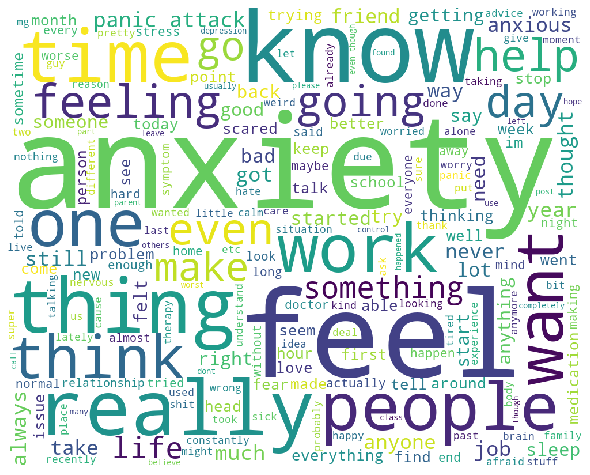

In [21]:
# Generate the word cloud for Anxiety data

comment_words = ' '
stopwords = set(STOPWORDS)
for row in final['clean_data'][final['subreddit']==0]:
    tokens = row.lower().split()   
    #print(tokens)
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 1000, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

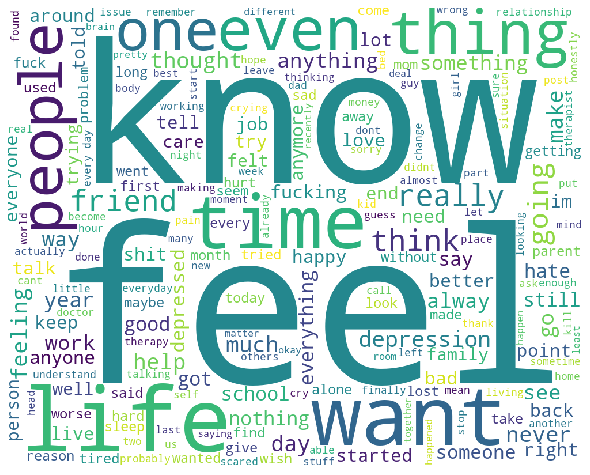

In [22]:
# Generate the word cloud for Depression data

comment_words = ' '
stopwords = set(STOPWORDS)
for row in final['clean_data'][final['subreddit']==1]:
    tokens = row.lower().split()   

          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 1000, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### Visualizing the top common words in Anxiety and depression data

In [23]:
# Function to calculate the frequency of words appearing in the dataset for Anxiety and Depression

def get_top_n_words(corpus):
    # Initiate a Count Vectorizer
    vec = CountVectorizer().fit(corpus)
    
    # Create a bag of words
    bag_of_words = vec.transform(corpus)
    
    # Calculate a list of frequency of each word
    sum_words = bag_of_words.sum(axis=0) 
    
    # Count the number of times has occurred based on fitted vectorizer vocabulary
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    # return the frequency of words
    return words_freq

In [24]:
# Create a dataframe for the common words appearing in depression data.

# Get the frequency of words using the above function
common_words_depression = get_top_n_words(final['text'][final['subreddit']==1])

# Create the dataframe
dep_common = pd.DataFrame(common_words_depression, columns = ['word','dep_count'])

print("There are {} distinct words in {} dataset.".format((dep_common.shape[0]),"Depression"))

There are 8245 distinct words in Depression dataset.


In [25]:
# Create a dataframe for the common words appearing in Anxiety data.

# Get the frequency of words using the above function
common_words_anxiety = get_top_n_words(final['text'][final['subreddit']==0])

# Create the dataframe
anx_common = pd.DataFrame(common_words_anxiety, columns = ['word','anx_count'])

print("There are {} distinct words in {} dataset.".format((anx_common.shape[0]),"Anxiety"))

There are 8224 distinct words in Anxiety dataset.


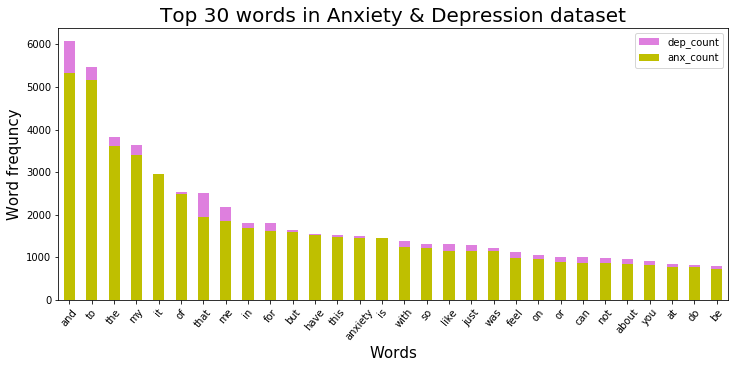

In [26]:
# Plotting a stacked bar plot to see the top 30 words in both dataset

# Plot the depression -- top 30 words 
ax = dep_common[:30].plot(kind='bar',color='m', x='word',y='dep_count',alpha=0.5, figsize=(12,5))

# Plot the anxiety -- top 30 words 
anx_common[:30].plot(kind='bar',color='y',ax=ax, x='word', y='anx_count')
ax.set_xticklabels(ax.get_xticklabels(),rotation=50);

# Give the title and labels
plt.title("Top 30 words in Anxiety & Depression dataset",fontsize=20)
plt.xlabel("Words",fontsize=15)
plt.ylabel("Word frequncy",fontsize=15);

**We can see that in our raw data, maximum words appearing in the text are stopwords. Therefore, lets analyze the frequency of words without stopwords.**

Let's check how many words are stopwords in the raw data.

In [27]:
# Function to calculate the frequency of words appearing in the dataset for Anxiety and Depression
# In this we will ignore the stop_words

def get_top_n_words(corpus):
    # Initiate a Count Vectorizer
    vec_nostop = CountVectorizer(stop_words='english').fit(corpus)
    
    # Create a bag of words
    bag_of_words = vec_nostop.transform(corpus)
    
    # Calculate a list of frequency of each word
    sum_words = bag_of_words.sum(axis=0) 
    
    # Count the number of times has occurred based on fitted vectorizer vocabulary
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec_nostop.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    # return the frequency of words
    return words_freq

In [28]:
# Create a dataframe for the common words (excluding stopwords) appearing in depression data.

# Get the frequency of words
common_words_dep = get_top_n_words(final['text'][final['subreddit']==1])

# Create a dataframe 
dep_common_nostop = pd.DataFrame(common_words_dep, columns = ['word','dep_count'])
print("There are {} distinct words in {} dataset.".format((dep_common_nostop.shape[0]),"Depression"))
print("\nThere were {} stopwords in original text.".format(dep_common.shape[0]-dep_common_nostop.shape[0]))

There are 7966 distinct words in Depression dataset.

There were 279 stopwords in original text.


In [29]:
# Create a dataframe for the common words (excluding stopwords) appearing in Anxiety data.

# get the frequency of words
common_words_anx = get_top_n_words(final['text'][final['subreddit']==0])

# Create a dataframe
anx_common_nostop = pd.DataFrame(common_words_anx, columns = ['word','anx_count'])

print("There are {} distinct words in {} dataset.".format((anx_common_nostop.shape[0]),"Anxiety"))
print("\nThere were {} stopwords in original text.".format(anx_common.shape[0]-anx_common_nostop.shape[0]))

There are 7951 distinct words in Anxiety dataset.

There were 273 stopwords in original text.


In [30]:
# Merging the top 30 frequent words from the above depression and anxiety created dataframes (excluding stopwords)

df_merged_top30 = pd.merge(dep_common_nostop[:30],anx_common_nostop[:30],on='word',how="outer")

# Have a look at merged dataframe
df_merged_top30.head()

,word,dep_count,anx_count
0,just,1556.0,1159.0
1,like,1214.0,1160.0
2,don,1115.0,664.0
3,feel,1055.0,976.0
4,know,821.0,662.0


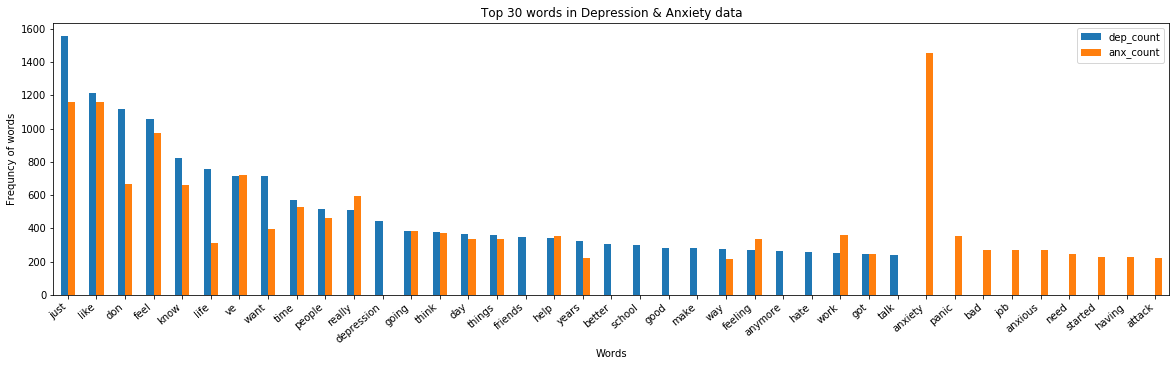

In [31]:
# Creating a grouped bar plot for top 30 frequent words

# Plot the top 30 words
ax = df_merged_top30.plot(kind='bar',x='word',figsize=(20,5))

# Set the axis labels, titles
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right');
plt.xlabel('Words')
plt.ylabel('Frequncy of words')
plt.title('Top 30 words in Depression & Anxiety data');

### Visualizing the common and individual words using Venn diagram

In [36]:
# Creating the set of words of top 30 words

# Create a set of top 50 words from depression data
set_depression = set(dep_common_nostop['word'][:50])

# Create a set of top 50 words from anxiety dataset
set_anxiety = set(anx_common_nostop['word'][:50])

# Create a set of words present only in depression data
depression_words = set_depression.difference(set_anxiety)

# Create a set of words present only in anxiety data
anxiety_words = set_anxiety.difference(set_depression)

# Create a set of words present in both anxiety & depression data
overlap_words = set_depression.intersection(set_anxiety)

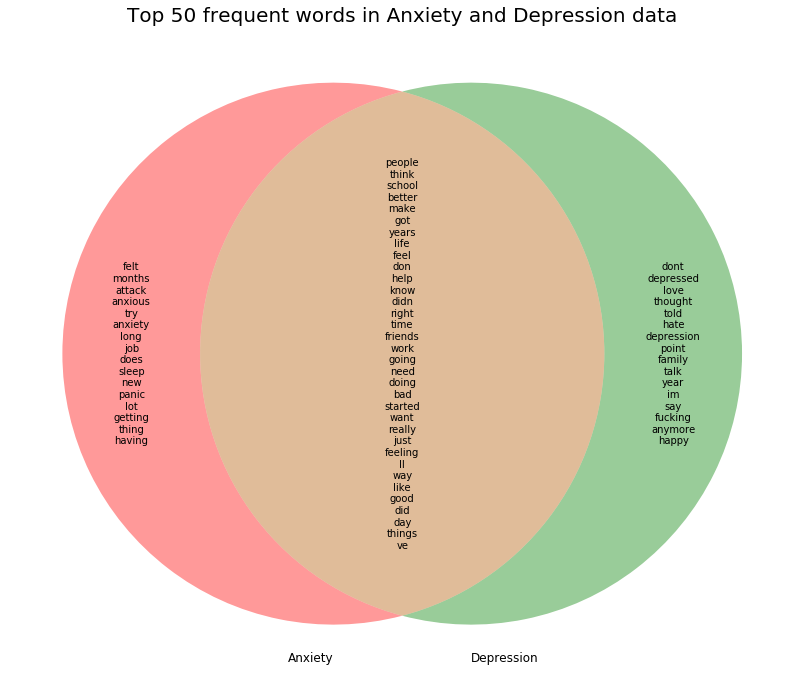

In [37]:
# Plot a Venn diagram

# setup the figure
fig = plt.figure(figsize=(20,12))
plt.title("Top 50 frequent words in Anxiety and Depression data", fontsize=20)

# Initiate the venn diagram
v = venn2([set_depression, set_anxiety], set_labels=['Anxiety', 'Depression'])

# Label the words in the Venn diagram
#Left only items, i.e, words only in Anxiety
v.get_label_by_id('10').set_text('\n'.join(anxiety_words))
# Right only items, i.e, words only in depression
v.get_label_by_id('01').set_text('\n'.join(depression_words))
# Overlapping items, i.e, words in depression & anxiety
v.get_label_by_id('11').set_text('\n'.join(overlap_words))

### Doing a sentiment analyses on our dataset.

I will be using the sklearn SentimentIntensityAnalyzer().

Through this function, we can know whether a text is positive/negative/neutral.

The Compound score from this function is a metric and normalized between -1(most extreme negative) and +1 (most extreme positive).

- positive sentiment : (compound score >= 0.05)
- neutral sentiment : (compound score > -0.05) and (compound score < 0.05)
- negative sentiment : (compound score <= -0.05)

In [38]:
# function to print sentiments of the sentence. 

def sentiment_scores(sentence): 
  
    # Create a SentimentIntensityAnalyzer object. 
    sid_obj = SentimentIntensityAnalyzer() 
  
    # polarity_scores method of SentimentIntensityAnalyzer 
    # object gives a sentiment dictionary. 
    # which contains pos, neg, neu, and compound scores. 
    sentiment_dict = sid_obj.polarity_scores(sentence) 
      
    print("Overall sentiment dictionary is : ", sentiment_dict) 
    print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative") 
    print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral") 
    print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive") 
    
    # Store the compound score into a list
    compound.append(round(sentiment_dict['compound'],2))

    return compound

In [39]:
# Create an empty list to store compound_score from SentimentAnalyzer object
compound = []

# Iterate through each sentence in the dataset and calculate its scores.
for row in final['clean_data']:
    
    # Call the function to create sentiment scores
    sentiment_scores(row)

Overall sentiment dictionary is :  {'neg': 0.368, 'neu': 0.632, 'pos': 0.0, 'compound': -0.5423}
sentence was rated as  36.8 % Negative
sentence was rated as  63.2 % Neutral
sentence was rated as  0.0 % Positive
Overall sentiment dictionary is :  {'neg': 0.303, 'neu': 0.498, 'pos': 0.199, 'compound': -0.847}
sentence was rated as  30.3 % Negative
sentence was rated as  49.8 % Neutral
sentence was rated as  19.900000000000002 % Positive
Overall sentiment dictionary is :  {'neg': 0.284, 'neu': 0.402, 'pos': 0.314, 'compound': 0.3612}
sentence was rated as  28.4 % Negative
sentence was rated as  40.2 % Neutral
sentence was rated as  31.4 % Positive
Overall sentiment dictionary is :  {'neg': 0.178, 'neu': 0.497, 'pos': 0.324, 'compound': 0.6093}
sentence was rated as  17.8 % Negative
sentence was rated as  49.7 % Neutral
sentence was rated as  32.4 % Positive
Overall sentiment dictionary is :  {'neg': 0.202, 'neu': 0.655, 'pos': 0.143, 'compound': -0.8341}
sentence was rated as  20.2000000

Overall sentiment dictionary is :  {'neg': 0.178, 'neu': 0.689, 'pos': 0.133, 'compound': -0.836}
sentence was rated as  17.8 % Negative
sentence was rated as  68.89999999999999 % Neutral
sentence was rated as  13.3 % Positive
Overall sentiment dictionary is :  {'neg': 0.356, 'neu': 0.383, 'pos': 0.261, 'compound': -0.6808}
sentence was rated as  35.6 % Negative
sentence was rated as  38.3 % Neutral
sentence was rated as  26.1 % Positive
Overall sentiment dictionary is :  {'neg': 0.172, 'neu': 0.639, 'pos': 0.189, 'compound': 0.4939}
sentence was rated as  17.2 % Negative
sentence was rated as  63.9 % Neutral
sentence was rated as  18.9 % Positive
Overall sentiment dictionary is :  {'neg': 0.414, 'neu': 0.442, 'pos': 0.144, 'compound': -0.9678}
sentence was rated as  41.4 % Negative
sentence was rated as  44.2 % Neutral
sentence was rated as  14.399999999999999 % Positive
Overall sentiment dictionary is :  {'neg': 0.24, 'neu': 0.597, 'pos': 0.163, 'compound': -0.5106}
sentence was rate

Overall sentiment dictionary is :  {'neg': 0.216, 'neu': 0.55, 'pos': 0.234, 'compound': 0.1027}
sentence was rated as  21.6 % Negative
sentence was rated as  55.00000000000001 % Neutral
sentence was rated as  23.400000000000002 % Positive
Overall sentiment dictionary is :  {'neg': 0.364, 'neu': 0.539, 'pos': 0.097, 'compound': -0.9868}
sentence was rated as  36.4 % Negative
sentence was rated as  53.900000000000006 % Neutral
sentence was rated as  9.700000000000001 % Positive
Overall sentiment dictionary is :  {'neg': 0.253, 'neu': 0.673, 'pos': 0.074, 'compound': -0.8746}
sentence was rated as  25.3 % Negative
sentence was rated as  67.30000000000001 % Neutral
sentence was rated as  7.3999999999999995 % Positive
Overall sentiment dictionary is :  {'neg': 0.11, 'neu': 0.567, 'pos': 0.322, 'compound': 0.9217}
sentence was rated as  11.0 % Negative
sentence was rated as  56.699999999999996 % Neutral
sentence was rated as  32.2 % Positive
Overall sentiment dictionary is :  {'neg': 0.221,

Overall sentiment dictionary is :  {'neg': 0.345, 'neu': 0.541, 'pos': 0.114, 'compound': -0.9952}
sentence was rated as  34.5 % Negative
sentence was rated as  54.1 % Neutral
sentence was rated as  11.4 % Positive
Overall sentiment dictionary is :  {'neg': 0.255, 'neu': 0.303, 'pos': 0.442, 'compound': 0.9565}
sentence was rated as  25.5 % Negative
sentence was rated as  30.3 % Neutral
sentence was rated as  44.2 % Positive
Overall sentiment dictionary is :  {'neg': 0.25, 'neu': 0.495, 'pos': 0.254, 'compound': -0.7579}
sentence was rated as  25.0 % Negative
sentence was rated as  49.5 % Neutral
sentence was rated as  25.4 % Positive
Overall sentiment dictionary is :  {'neg': 0.137, 'neu': 0.617, 'pos': 0.246, 'compound': 0.9831}
sentence was rated as  13.700000000000001 % Negative
sentence was rated as  61.7 % Neutral
sentence was rated as  24.6 % Positive
Overall sentiment dictionary is :  {'neg': 0.188, 'neu': 0.59, 'pos': 0.222, 'compound': 0.5773}
sentence was rated as  18.8 % Ne

Overall sentiment dictionary is :  {'neg': 0.181, 'neu': 0.585, 'pos': 0.233, 'compound': 0.8718}
sentence was rated as  18.099999999999998 % Negative
sentence was rated as  58.5 % Neutral
sentence was rated as  23.3 % Positive
Overall sentiment dictionary is :  {'neg': 0.078, 'neu': 0.461, 'pos': 0.461, 'compound': 0.9786}
sentence was rated as  7.8 % Negative
sentence was rated as  46.1 % Neutral
sentence was rated as  46.1 % Positive
Overall sentiment dictionary is :  {'neg': 0.283, 'neu': 0.558, 'pos': 0.159, 'compound': -0.9633}
sentence was rated as  28.299999999999997 % Negative
sentence was rated as  55.800000000000004 % Neutral
sentence was rated as  15.9 % Positive
Overall sentiment dictionary is :  {'neg': 0.231, 'neu': 0.496, 'pos': 0.274, 'compound': 0.0227}
sentence was rated as  23.1 % Negative
sentence was rated as  49.6 % Neutral
sentence was rated as  27.400000000000002 % Positive
Overall sentiment dictionary is :  {'neg': 0.218, 'neu': 0.577, 'pos': 0.205, 'compound'

Overall sentiment dictionary is :  {'neg': 0.194, 'neu': 0.646, 'pos': 0.159, 'compound': -0.9179}
sentence was rated as  19.400000000000002 % Negative
sentence was rated as  64.60000000000001 % Neutral
sentence was rated as  15.9 % Positive
Overall sentiment dictionary is :  {'neg': 0.385, 'neu': 0.444, 'pos': 0.171, 'compound': -0.9722}
sentence was rated as  38.5 % Negative
sentence was rated as  44.4 % Neutral
sentence was rated as  17.1 % Positive
Overall sentiment dictionary is :  {'neg': 0.334, 'neu': 0.554, 'pos': 0.112, 'compound': -0.9371}
sentence was rated as  33.4 % Negative
sentence was rated as  55.400000000000006 % Neutral
sentence was rated as  11.200000000000001 % Positive
Overall sentiment dictionary is :  {'neg': 0.297, 'neu': 0.637, 'pos': 0.066, 'compound': -0.9788}
sentence was rated as  29.7 % Negative
sentence was rated as  63.7 % Neutral
sentence was rated as  6.6000000000000005 % Positive
Overall sentiment dictionary is :  {'neg': 0.293, 'neu': 0.534, 'pos': 

Overall sentiment dictionary is :  {'neg': 0.272, 'neu': 0.417, 'pos': 0.312, 'compound': 0.25}
sentence was rated as  27.200000000000003 % Negative
sentence was rated as  41.699999999999996 % Neutral
sentence was rated as  31.2 % Positive
Overall sentiment dictionary is :  {'neg': 0.341, 'neu': 0.604, 'pos': 0.055, 'compound': -0.9274}
sentence was rated as  34.1 % Negative
sentence was rated as  60.4 % Neutral
sentence was rated as  5.5 % Positive
Overall sentiment dictionary is :  {'neg': 0.234, 'neu': 0.615, 'pos': 0.15, 'compound': -0.8689}
sentence was rated as  23.400000000000002 % Negative
sentence was rated as  61.5 % Neutral
sentence was rated as  15.0 % Positive
Overall sentiment dictionary is :  {'neg': 0.17, 'neu': 0.631, 'pos': 0.199, 'compound': 0.5797}
sentence was rated as  17.0 % Negative
sentence was rated as  63.1 % Neutral
sentence was rated as  19.900000000000002 % Positive
Overall sentiment dictionary is :  {'neg': 0.287, 'neu': 0.544, 'pos': 0.17, 'compound': -0

Overall sentiment dictionary is :  {'neg': 0.102, 'neu': 0.824, 'pos': 0.074, 'compound': -0.34}
sentence was rated as  10.2 % Negative
sentence was rated as  82.39999999999999 % Neutral
sentence was rated as  7.3999999999999995 % Positive
Overall sentiment dictionary is :  {'neg': 0.437, 'neu': 0.419, 'pos': 0.144, 'compound': -0.9061}
sentence was rated as  43.7 % Negative
sentence was rated as  41.9 % Neutral
sentence was rated as  14.399999999999999 % Positive
Overall sentiment dictionary is :  {'neg': 0.376, 'neu': 0.506, 'pos': 0.118, 'compound': -0.936}
sentence was rated as  37.6 % Negative
sentence was rated as  50.6 % Neutral
sentence was rated as  11.799999999999999 % Positive
Overall sentiment dictionary is :  {'neg': 0.385, 'neu': 0.487, 'pos': 0.128, 'compound': -0.701}
sentence was rated as  38.5 % Negative
sentence was rated as  48.699999999999996 % Neutral
sentence was rated as  12.8 % Positive
Overall sentiment dictionary is :  {'neg': 0.232, 'neu': 0.6, 'pos': 0.168,

Overall sentiment dictionary is :  {'neg': 0.354, 'neu': 0.455, 'pos': 0.192, 'compound': -0.6597}
sentence was rated as  35.4 % Negative
sentence was rated as  45.5 % Neutral
sentence was rated as  19.2 % Positive
Overall sentiment dictionary is :  {'neg': 0.474, 'neu': 0.449, 'pos': 0.077, 'compound': -0.9423}
sentence was rated as  47.4 % Negative
sentence was rated as  44.9 % Neutral
sentence was rated as  7.7 % Positive
Overall sentiment dictionary is :  {'neg': 0.23, 'neu': 0.518, 'pos': 0.251, 'compound': 0.4201}
sentence was rated as  23.0 % Negative
sentence was rated as  51.800000000000004 % Neutral
sentence was rated as  25.1 % Positive
Overall sentiment dictionary is :  {'neg': 0.152, 'neu': 0.848, 'pos': 0.0, 'compound': -0.34}
sentence was rated as  15.2 % Negative
sentence was rated as  84.8 % Neutral
sentence was rated as  0.0 % Positive
Overall sentiment dictionary is :  {'neg': 0.143, 'neu': 0.423, 'pos': 0.434, 'compound': 0.93}
sentence was rated as  14.299999999999

Overall sentiment dictionary is :  {'neg': 0.255, 'neu': 0.414, 'pos': 0.331, 'compound': 0.8993}
sentence was rated as  25.5 % Negative
sentence was rated as  41.4 % Neutral
sentence was rated as  33.1 % Positive
Overall sentiment dictionary is :  {'neg': 0.282, 'neu': 0.552, 'pos': 0.166, 'compound': -0.9173}
sentence was rated as  28.199999999999996 % Negative
sentence was rated as  55.2 % Neutral
sentence was rated as  16.6 % Positive
Overall sentiment dictionary is :  {'neg': 0.194, 'neu': 0.624, 'pos': 0.182, 'compound': 0.5305}
sentence was rated as  19.400000000000002 % Negative
sentence was rated as  62.4 % Neutral
sentence was rated as  18.2 % Positive
Overall sentiment dictionary is :  {'neg': 0.349, 'neu': 0.458, 'pos': 0.193, 'compound': -0.9321}
sentence was rated as  34.9 % Negative
sentence was rated as  45.800000000000004 % Neutral
sentence was rated as  19.3 % Positive
Overall sentiment dictionary is :  {'neg': 0.551, 'neu': 0.253, 'pos': 0.196, 'compound': -0.8807}
s

Overall sentiment dictionary is :  {'neg': 0.206, 'neu': 0.51, 'pos': 0.283, 'compound': 0.9346}
sentence was rated as  20.599999999999998 % Negative
sentence was rated as  51.0 % Neutral
sentence was rated as  28.299999999999997 % Positive
Overall sentiment dictionary is :  {'neg': 0.491, 'neu': 0.447, 'pos': 0.062, 'compound': -0.9918}
sentence was rated as  49.1 % Negative
sentence was rated as  44.7 % Neutral
sentence was rated as  6.2 % Positive
Overall sentiment dictionary is :  {'neg': 0.313, 'neu': 0.551, 'pos': 0.135, 'compound': -0.7269}
sentence was rated as  31.3 % Negative
sentence was rated as  55.1 % Neutral
sentence was rated as  13.5 % Positive
Overall sentiment dictionary is :  {'neg': 0.287, 'neu': 0.576, 'pos': 0.137, 'compound': -0.8985}
sentence was rated as  28.7 % Negative
sentence was rated as  57.599999999999994 % Neutral
sentence was rated as  13.700000000000001 % Positive
Overall sentiment dictionary is :  {'neg': 0.187, 'neu': 0.549, 'pos': 0.264, 'compound

Overall sentiment dictionary is :  {'neg': 0.323, 'neu': 0.608, 'pos': 0.069, 'compound': -0.802}
sentence was rated as  32.300000000000004 % Negative
sentence was rated as  60.8 % Neutral
sentence was rated as  6.9 % Positive
Overall sentiment dictionary is :  {'neg': 0.195, 'neu': 0.58, 'pos': 0.226, 'compound': -0.2862}
sentence was rated as  19.5 % Negative
sentence was rated as  57.99999999999999 % Neutral
sentence was rated as  22.6 % Positive
Overall sentiment dictionary is :  {'neg': 0.458, 'neu': 0.318, 'pos': 0.224, 'compound': -0.9686}
sentence was rated as  45.800000000000004 % Negative
sentence was rated as  31.8 % Neutral
sentence was rated as  22.400000000000002 % Positive
Overall sentiment dictionary is :  {'neg': 0.409, 'neu': 0.348, 'pos': 0.243, 'compound': -0.8979}
sentence was rated as  40.9 % Negative
sentence was rated as  34.8 % Neutral
sentence was rated as  24.3 % Positive
Overall sentiment dictionary is :  {'neg': 0.417, 'neu': 0.583, 'pos': 0.0, 'compound': 

Overall sentiment dictionary is :  {'neg': 0.225, 'neu': 0.522, 'pos': 0.253, 'compound': 0.5267}
sentence was rated as  22.5 % Negative
sentence was rated as  52.2 % Neutral
sentence was rated as  25.3 % Positive
Overall sentiment dictionary is :  {'neg': 0.185, 'neu': 0.772, 'pos': 0.043, 'compound': -0.8955}
sentence was rated as  18.5 % Negative
sentence was rated as  77.2 % Neutral
sentence was rated as  4.3 % Positive
Overall sentiment dictionary is :  {'neg': 0.277, 'neu': 0.344, 'pos': 0.379, 'compound': 0.9136}
sentence was rated as  27.700000000000003 % Negative
sentence was rated as  34.4 % Neutral
sentence was rated as  37.9 % Positive
Overall sentiment dictionary is :  {'neg': 0.378, 'neu': 0.485, 'pos': 0.138, 'compound': -0.7506}
sentence was rated as  37.8 % Negative
sentence was rated as  48.5 % Neutral
sentence was rated as  13.8 % Positive
Overall sentiment dictionary is :  {'neg': 0.069, 'neu': 0.776, 'pos': 0.155, 'compound': 0.4588}
sentence was rated as  6.9 % Ne

Overall sentiment dictionary is :  {'neg': 0.427, 'neu': 0.408, 'pos': 0.165, 'compound': -0.9675}
sentence was rated as  42.699999999999996 % Negative
sentence was rated as  40.8 % Neutral
sentence was rated as  16.5 % Positive
Overall sentiment dictionary is :  {'neg': 0.243, 'neu': 0.525, 'pos': 0.232, 'compound': 0.3612}
sentence was rated as  24.3 % Negative
sentence was rated as  52.5 % Neutral
sentence was rated as  23.200000000000003 % Positive
Overall sentiment dictionary is :  {'neg': 0.327, 'neu': 0.655, 'pos': 0.018, 'compound': -0.9648}
sentence was rated as  32.7 % Negative
sentence was rated as  65.5 % Neutral
sentence was rated as  1.7999999999999998 % Positive
Overall sentiment dictionary is :  {'neg': 0.254, 'neu': 0.534, 'pos': 0.212, 'compound': -0.2732}
sentence was rated as  25.4 % Negative
sentence was rated as  53.400000000000006 % Neutral
sentence was rated as  21.2 % Positive
Overall sentiment dictionary is :  {'neg': 0.126, 'neu': 0.874, 'pos': 0.0, 'compound

Overall sentiment dictionary is :  {'neg': 0.145, 'neu': 0.61, 'pos': 0.244, 'compound': 0.765}
sentence was rated as  14.499999999999998 % Negative
sentence was rated as  61.0 % Neutral
sentence was rated as  24.4 % Positive
Overall sentiment dictionary is :  {'neg': 0.18, 'neu': 0.781, 'pos': 0.039, 'compound': -0.8074}
sentence was rated as  18.0 % Negative
sentence was rated as  78.10000000000001 % Neutral
sentence was rated as  3.9 % Positive
Overall sentiment dictionary is :  {'neg': 0.226, 'neu': 0.554, 'pos': 0.22, 'compound': 0.5186}
sentence was rated as  22.6 % Negative
sentence was rated as  55.400000000000006 % Neutral
sentence was rated as  22.0 % Positive
Overall sentiment dictionary is :  {'neg': 0.124, 'neu': 0.786, 'pos': 0.09, 'compound': -0.2134}
sentence was rated as  12.4 % Negative
sentence was rated as  78.60000000000001 % Neutral
sentence was rated as  9.0 % Positive
Overall sentiment dictionary is :  {'neg': 0.415, 'neu': 0.452, 'pos': 0.133, 'compound': -0.99

Overall sentiment dictionary is :  {'neg': 0.229, 'neu': 0.545, 'pos': 0.227, 'compound': -0.8591}
sentence was rated as  22.900000000000002 % Negative
sentence was rated as  54.50000000000001 % Neutral
sentence was rated as  22.7 % Positive
Overall sentiment dictionary is :  {'neg': 0.372, 'neu': 0.516, 'pos': 0.111, 'compound': -0.8622}
sentence was rated as  37.2 % Negative
sentence was rated as  51.6 % Neutral
sentence was rated as  11.1 % Positive
Overall sentiment dictionary is :  {'neg': 0.437, 'neu': 0.443, 'pos': 0.12, 'compound': -0.6124}
sentence was rated as  43.7 % Negative
sentence was rated as  44.3 % Neutral
sentence was rated as  12.0 % Positive
Overall sentiment dictionary is :  {'neg': 0.096, 'neu': 0.822, 'pos': 0.082, 'compound': -0.2023}
sentence was rated as  9.6 % Negative
sentence was rated as  82.19999999999999 % Neutral
sentence was rated as  8.200000000000001 % Positive
Overall sentiment dictionary is :  {'neg': 0.093, 'neu': 0.643, 'pos': 0.264, 'compound':

Overall sentiment dictionary is :  {'neg': 0.076, 'neu': 0.63, 'pos': 0.294, 'compound': 0.9354}
sentence was rated as  7.6 % Negative
sentence was rated as  63.0 % Neutral
sentence was rated as  29.4 % Positive
Overall sentiment dictionary is :  {'neg': 0.301, 'neu': 0.528, 'pos': 0.171, 'compound': -0.9118}
sentence was rated as  30.099999999999998 % Negative
sentence was rated as  52.800000000000004 % Neutral
sentence was rated as  17.1 % Positive
Overall sentiment dictionary is :  {'neg': 0.281, 'neu': 0.538, 'pos': 0.182, 'compound': -0.9529}
sentence was rated as  28.1 % Negative
sentence was rated as  53.800000000000004 % Neutral
sentence was rated as  18.2 % Positive
Overall sentiment dictionary is :  {'neg': 0.243, 'neu': 0.558, 'pos': 0.199, 'compound': -0.4927}
sentence was rated as  24.3 % Negative
sentence was rated as  55.800000000000004 % Neutral
sentence was rated as  19.900000000000002 % Positive
Overall sentiment dictionary is :  {'neg': 0.133, 'neu': 0.606, 'pos': 0.

Overall sentiment dictionary is :  {'neg': 0.336, 'neu': 0.51, 'pos': 0.154, 'compound': -0.97}
sentence was rated as  33.6 % Negative
sentence was rated as  51.0 % Neutral
sentence was rated as  15.4 % Positive
Overall sentiment dictionary is :  {'neg': 0.254, 'neu': 0.507, 'pos': 0.239, 'compound': -0.17}
sentence was rated as  25.4 % Negative
sentence was rated as  50.7 % Neutral
sentence was rated as  23.9 % Positive
Overall sentiment dictionary is :  {'neg': 0.232, 'neu': 0.566, 'pos': 0.202, 'compound': -0.6404}
sentence was rated as  23.200000000000003 % Negative
sentence was rated as  56.599999999999994 % Neutral
sentence was rated as  20.200000000000003 % Positive
Overall sentiment dictionary is :  {'neg': 0.311, 'neu': 0.513, 'pos': 0.175, 'compound': -0.717}
sentence was rated as  31.1 % Negative
sentence was rated as  51.300000000000004 % Neutral
sentence was rated as  17.5 % Positive
Overall sentiment dictionary is :  {'neg': 0.551, 'neu': 0.449, 'pos': 0.0, 'compound': -0

Overall sentiment dictionary is :  {'neg': 0.3, 'neu': 0.432, 'pos': 0.268, 'compound': -0.079}
sentence was rated as  30.0 % Negative
sentence was rated as  43.2 % Neutral
sentence was rated as  26.8 % Positive
Overall sentiment dictionary is :  {'neg': 0.316, 'neu': 0.557, 'pos': 0.127, 'compound': -0.9495}
sentence was rated as  31.6 % Negative
sentence was rated as  55.7 % Neutral
sentence was rated as  12.7 % Positive
Overall sentiment dictionary is :  {'neg': 0.284, 'neu': 0.513, 'pos': 0.204, 'compound': -0.6394}
sentence was rated as  28.4 % Negative
sentence was rated as  51.300000000000004 % Neutral
sentence was rated as  20.4 % Positive
Overall sentiment dictionary is :  {'neg': 0.161, 'neu': 0.46, 'pos': 0.379, 'compound': 0.8173}
sentence was rated as  16.1 % Negative
sentence was rated as  46.0 % Neutral
sentence was rated as  37.9 % Positive
Overall sentiment dictionary is :  {'neg': 0.231, 'neu': 0.542, 'pos': 0.226, 'compound': -0.3915}
sentence was rated as  23.1 % Ne

Overall sentiment dictionary is :  {'neg': 0.08, 'neu': 0.725, 'pos': 0.194, 'compound': 0.9813}
sentence was rated as  8.0 % Negative
sentence was rated as  72.5 % Neutral
sentence was rated as  19.400000000000002 % Positive
Overall sentiment dictionary is :  {'neg': 0.225, 'neu': 0.476, 'pos': 0.299, 'compound': 0.5379}
sentence was rated as  22.5 % Negative
sentence was rated as  47.599999999999994 % Neutral
sentence was rated as  29.9 % Positive
Overall sentiment dictionary is :  {'neg': 0.237, 'neu': 0.45, 'pos': 0.313, 'compound': 0.8442}
sentence was rated as  23.7 % Negative
sentence was rated as  45.0 % Neutral
sentence was rated as  31.3 % Positive
Overall sentiment dictionary is :  {'neg': 0.185, 'neu': 0.534, 'pos': 0.281, 'compound': 0.8497}
sentence was rated as  18.5 % Negative
sentence was rated as  53.400000000000006 % Neutral
sentence was rated as  28.1 % Positive
Overall sentiment dictionary is :  {'neg': 0.45, 'neu': 0.467, 'pos': 0.083, 'compound': -0.875}
sentence

Overall sentiment dictionary is :  {'neg': 0.127, 'neu': 0.668, 'pos': 0.206, 'compound': 0.9903}
sentence was rated as  12.7 % Negative
sentence was rated as  66.8 % Neutral
sentence was rated as  20.599999999999998 % Positive
Overall sentiment dictionary is :  {'neg': 0.271, 'neu': 0.542, 'pos': 0.187, 'compound': -0.9789}
sentence was rated as  27.1 % Negative
sentence was rated as  54.2 % Neutral
sentence was rated as  18.7 % Positive
Overall sentiment dictionary is :  {'neg': 0.151, 'neu': 0.669, 'pos': 0.18, 'compound': 0.0}
sentence was rated as  15.1 % Negative
sentence was rated as  66.9 % Neutral
sentence was rated as  18.0 % Positive
Overall sentiment dictionary is :  {'neg': 0.225, 'neu': 0.556, 'pos': 0.219, 'compound': -0.3906}
sentence was rated as  22.5 % Negative
sentence was rated as  55.60000000000001 % Neutral
sentence was rated as  21.9 % Positive
Overall sentiment dictionary is :  {'neg': 0.171, 'neu': 0.699, 'pos': 0.13, 'compound': -0.2698}
sentence was rated as

Overall sentiment dictionary is :  {'neg': 0.365, 'neu': 0.635, 'pos': 0.0, 'compound': -0.836}
sentence was rated as  36.5 % Negative
sentence was rated as  63.5 % Neutral
sentence was rated as  0.0 % Positive
Overall sentiment dictionary is :  {'neg': 0.292, 'neu': 0.598, 'pos': 0.11, 'compound': -0.9726}
sentence was rated as  29.2 % Negative
sentence was rated as  59.8 % Neutral
sentence was rated as  11.0 % Positive
Overall sentiment dictionary is :  {'neg': 0.277, 'neu': 0.58, 'pos': 0.143, 'compound': -0.9714}
sentence was rated as  27.700000000000003 % Negative
sentence was rated as  57.99999999999999 % Neutral
sentence was rated as  14.299999999999999 % Positive
Overall sentiment dictionary is :  {'neg': 0.217, 'neu': 0.622, 'pos': 0.161, 'compound': -0.4019}
sentence was rated as  21.7 % Negative
sentence was rated as  62.2 % Neutral
sentence was rated as  16.1 % Positive
Overall sentiment dictionary is :  {'neg': 0.386, 'neu': 0.301, 'pos': 0.313, 'compound': -0.85}
sentence

Overall sentiment dictionary is :  {'neg': 0.182, 'neu': 0.46, 'pos': 0.358, 'compound': 0.9995}
sentence was rated as  18.2 % Negative
sentence was rated as  46.0 % Neutral
sentence was rated as  35.8 % Positive
Overall sentiment dictionary is :  {'neg': 0.229, 'neu': 0.463, 'pos': 0.308, 'compound': 0.955}
sentence was rated as  22.900000000000002 % Negative
sentence was rated as  46.300000000000004 % Neutral
sentence was rated as  30.8 % Positive
Overall sentiment dictionary is :  {'neg': 0.27, 'neu': 0.561, 'pos': 0.168, 'compound': -0.4404}
sentence was rated as  27.0 % Negative
sentence was rated as  56.10000000000001 % Neutral
sentence was rated as  16.8 % Positive
Overall sentiment dictionary is :  {'neg': 0.34, 'neu': 0.467, 'pos': 0.192, 'compound': -0.9394}
sentence was rated as  34.0 % Negative
sentence was rated as  46.7 % Neutral
sentence was rated as  19.2 % Positive
Overall sentiment dictionary is :  {'neg': 0.364, 'neu': 0.408, 'pos': 0.229, 'compound': -0.9661}
senten

Overall sentiment dictionary is :  {'neg': 0.364, 'neu': 0.421, 'pos': 0.215, 'compound': -0.8689}
sentence was rated as  36.4 % Negative
sentence was rated as  42.1 % Neutral
sentence was rated as  21.5 % Positive
Overall sentiment dictionary is :  {'neg': 0.651, 'neu': 0.203, 'pos': 0.145, 'compound': -0.9607}
sentence was rated as  65.10000000000001 % Negative
sentence was rated as  20.3 % Neutral
sentence was rated as  14.499999999999998 % Positive
Overall sentiment dictionary is :  {'neg': 0.274, 'neu': 0.53, 'pos': 0.196, 'compound': -0.8603}
sentence was rated as  27.400000000000002 % Negative
sentence was rated as  53.0 % Neutral
sentence was rated as  19.6 % Positive
Overall sentiment dictionary is :  {'neg': 0.187, 'neu': 0.467, 'pos': 0.346, 'compound': 0.8625}
sentence was rated as  18.7 % Negative
sentence was rated as  46.7 % Neutral
sentence was rated as  34.599999999999994 % Positive
Overall sentiment dictionary is :  {'neg': 0.383, 'neu': 0.547, 'pos': 0.07, 'compound'

Overall sentiment dictionary is :  {'neg': 0.622, 'neu': 0.254, 'pos': 0.124, 'compound': -0.9924}
sentence was rated as  62.2 % Negative
sentence was rated as  25.4 % Neutral
sentence was rated as  12.4 % Positive
Overall sentiment dictionary is :  {'neg': 0.228, 'neu': 0.493, 'pos': 0.279, 'compound': 0.8591}
sentence was rated as  22.8 % Negative
sentence was rated as  49.3 % Neutral
sentence was rated as  27.900000000000002 % Positive
Overall sentiment dictionary is :  {'neg': 0.282, 'neu': 0.512, 'pos': 0.206, 'compound': -0.996}
sentence was rated as  28.199999999999996 % Negative
sentence was rated as  51.2 % Neutral
sentence was rated as  20.599999999999998 % Positive
Overall sentiment dictionary is :  {'neg': 0.162, 'neu': 0.349, 'pos': 0.489, 'compound': 0.7579}
sentence was rated as  16.2 % Negative
sentence was rated as  34.9 % Neutral
sentence was rated as  48.9 % Positive
Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.547, 'pos': 0.453, 'compound': 0.7003}
sente

Overall sentiment dictionary is :  {'neg': 0.388, 'neu': 0.441, 'pos': 0.171, 'compound': -0.8555}
sentence was rated as  38.800000000000004 % Negative
sentence was rated as  44.1 % Neutral
sentence was rated as  17.1 % Positive
Overall sentiment dictionary is :  {'neg': 0.17, 'neu': 0.61, 'pos': 0.221, 'compound': 0.3245}
sentence was rated as  17.0 % Negative
sentence was rated as  61.0 % Neutral
sentence was rated as  22.1 % Positive
Overall sentiment dictionary is :  {'neg': 0.147, 'neu': 0.604, 'pos': 0.248, 'compound': 0.9776}
sentence was rated as  14.7 % Negative
sentence was rated as  60.4 % Neutral
sentence was rated as  24.8 % Positive
Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.9, 'pos': 0.1, 'compound': 0.4404}
sentence was rated as  0.0 % Negative
sentence was rated as  90.0 % Neutral
sentence was rated as  10.0 % Positive
Overall sentiment dictionary is :  {'neg': 0.104, 'neu': 0.605, 'pos': 0.292, 'compound': 0.6378}
sentence was rated as  10.4 % Negative
s

Overall sentiment dictionary is :  {'neg': 0.412, 'neu': 0.553, 'pos': 0.035, 'compound': -0.9549}
sentence was rated as  41.199999999999996 % Negative
sentence was rated as  55.300000000000004 % Neutral
sentence was rated as  3.5000000000000004 % Positive
Overall sentiment dictionary is :  {'neg': 0.353, 'neu': 0.345, 'pos': 0.301, 'compound': -0.5719}
sentence was rated as  35.3 % Negative
sentence was rated as  34.5 % Neutral
sentence was rated as  30.099999999999998 % Positive
Overall sentiment dictionary is :  {'neg': 0.273, 'neu': 0.455, 'pos': 0.273, 'compound': -0.25}
sentence was rated as  27.3 % Negative
sentence was rated as  45.5 % Neutral
sentence was rated as  27.3 % Positive
Overall sentiment dictionary is :  {'neg': 0.245, 'neu': 0.469, 'pos': 0.286, 'compound': 0.5994}
sentence was rated as  24.5 % Negative
sentence was rated as  46.9 % Neutral
sentence was rated as  28.599999999999998 % Positive
Overall sentiment dictionary is :  {'neg': 0.42, 'neu': 0.369, 'pos': 0.2

Overall sentiment dictionary is :  {'neg': 0.145, 'neu': 0.504, 'pos': 0.351, 'compound': 0.9941}
sentence was rated as  14.499999999999998 % Negative
sentence was rated as  50.4 % Neutral
sentence was rated as  35.099999999999994 % Positive
Overall sentiment dictionary is :  {'neg': 0.299, 'neu': 0.47, 'pos': 0.231, 'compound': -0.8329}
sentence was rated as  29.9 % Negative
sentence was rated as  47.0 % Neutral
sentence was rated as  23.1 % Positive
Overall sentiment dictionary is :  {'neg': 0.137, 'neu': 0.509, 'pos': 0.354, 'compound': 0.7579}
sentence was rated as  13.700000000000001 % Negative
sentence was rated as  50.9 % Neutral
sentence was rated as  35.4 % Positive
Overall sentiment dictionary is :  {'neg': 0.288, 'neu': 0.629, 'pos': 0.083, 'compound': -0.7351}
sentence was rated as  28.799999999999997 % Negative
sentence was rated as  62.9 % Neutral
sentence was rated as  8.3 % Positive
Overall sentiment dictionary is :  {'neg': 0.271, 'neu': 0.471, 'pos': 0.259, 'compound'

Overall sentiment dictionary is :  {'neg': 0.146, 'neu': 0.414, 'pos': 0.44, 'compound': 0.9953}
sentence was rated as  14.6 % Negative
sentence was rated as  41.4 % Neutral
sentence was rated as  44.0 % Positive
Overall sentiment dictionary is :  {'neg': 0.218, 'neu': 0.516, 'pos': 0.267, 'compound': 0.1441}
sentence was rated as  21.8 % Negative
sentence was rated as  51.6 % Neutral
sentence was rated as  26.700000000000003 % Positive
Overall sentiment dictionary is :  {'neg': 0.317, 'neu': 0.268, 'pos': 0.414, 'compound': 0.5024}
sentence was rated as  31.7 % Negative
sentence was rated as  26.8 % Neutral
sentence was rated as  41.4 % Positive
Overall sentiment dictionary is :  {'neg': 0.166, 'neu': 0.571, 'pos': 0.263, 'compound': 0.9924}
sentence was rated as  16.6 % Negative
sentence was rated as  57.099999999999994 % Neutral
sentence was rated as  26.3 % Positive
Overall sentiment dictionary is :  {'neg': 0.34, 'neu': 0.52, 'pos': 0.14, 'compound': -0.9689}
sentence was rated as

Overall sentiment dictionary is :  {'neg': 0.193, 'neu': 0.624, 'pos': 0.183, 'compound': -0.9701}
sentence was rated as  19.3 % Negative
sentence was rated as  62.4 % Neutral
sentence was rated as  18.3 % Positive
Overall sentiment dictionary is :  {'neg': 0.265, 'neu': 0.355, 'pos': 0.38, 'compound': 0.6249}
sentence was rated as  26.5 % Negative
sentence was rated as  35.5 % Neutral
sentence was rated as  38.0 % Positive
Overall sentiment dictionary is :  {'neg': 0.251, 'neu': 0.53, 'pos': 0.219, 'compound': -0.5853}
sentence was rated as  25.1 % Negative
sentence was rated as  53.0 % Neutral
sentence was rated as  21.9 % Positive
Overall sentiment dictionary is :  {'neg': 0.324, 'neu': 0.394, 'pos': 0.281, 'compound': -0.95}
sentence was rated as  32.4 % Negative
sentence was rated as  39.4 % Neutral
sentence was rated as  28.1 % Positive
Overall sentiment dictionary is :  {'neg': 0.191, 'neu': 0.655, 'pos': 0.153, 'compound': -0.8982}
sentence was rated as  19.1 % Negative
sentenc

Overall sentiment dictionary is :  {'neg': 0.344, 'neu': 0.508, 'pos': 0.148, 'compound': -0.836}
sentence was rated as  34.4 % Negative
sentence was rated as  50.8 % Neutral
sentence was rated as  14.799999999999999 % Positive
Overall sentiment dictionary is :  {'neg': 0.387, 'neu': 0.43, 'pos': 0.184, 'compound': -0.7309}
sentence was rated as  38.7 % Negative
sentence was rated as  43.0 % Neutral
sentence was rated as  18.4 % Positive
Overall sentiment dictionary is :  {'neg': 0.555, 'neu': 0.445, 'pos': 0.0, 'compound': -0.9099}
sentence was rated as  55.50000000000001 % Negative
sentence was rated as  44.5 % Neutral
sentence was rated as  0.0 % Positive
Overall sentiment dictionary is :  {'neg': 0.365, 'neu': 0.497, 'pos': 0.138, 'compound': -0.802}
sentence was rated as  36.5 % Negative
sentence was rated as  49.7 % Neutral
sentence was rated as  13.8 % Positive
Overall sentiment dictionary is :  {'neg': 0.263, 'neu': 0.484, 'pos': 0.254, 'compound': -0.4392}
sentence was rated a

Overall sentiment dictionary is :  {'neg': 0.224, 'neu': 0.608, 'pos': 0.169, 'compound': -0.9954}
sentence was rated as  22.400000000000002 % Negative
sentence was rated as  60.8 % Neutral
sentence was rated as  16.900000000000002 % Positive
Overall sentiment dictionary is :  {'neg': 0.294, 'neu': 0.672, 'pos': 0.034, 'compound': -0.8958}
sentence was rated as  29.4 % Negative
sentence was rated as  67.2 % Neutral
sentence was rated as  3.4000000000000004 % Positive
Overall sentiment dictionary is :  {'neg': 0.386, 'neu': 0.491, 'pos': 0.123, 'compound': -0.8855}
sentence was rated as  38.6 % Negative
sentence was rated as  49.1 % Neutral
sentence was rated as  12.3 % Positive
Overall sentiment dictionary is :  {'neg': 0.224, 'neu': 0.619, 'pos': 0.157, 'compound': -0.5795}
sentence was rated as  22.400000000000002 % Negative
sentence was rated as  61.9 % Neutral
sentence was rated as  15.7 % Positive
Overall sentiment dictionary is :  {'neg': 0.2, 'neu': 0.579, 'pos': 0.221, 'compoun

Overall sentiment dictionary is :  {'neg': 0.259, 'neu': 0.502, 'pos': 0.24, 'compound': -0.9898}
sentence was rated as  25.900000000000002 % Negative
sentence was rated as  50.2 % Neutral
sentence was rated as  24.0 % Positive
Overall sentiment dictionary is :  {'neg': 0.281, 'neu': 0.507, 'pos': 0.212, 'compound': -0.6808}
sentence was rated as  28.1 % Negative
sentence was rated as  50.7 % Neutral
sentence was rated as  21.2 % Positive
Overall sentiment dictionary is :  {'neg': 0.384, 'neu': 0.379, 'pos': 0.238, 'compound': -0.895}
sentence was rated as  38.4 % Negative
sentence was rated as  37.9 % Neutral
sentence was rated as  23.799999999999997 % Positive
Overall sentiment dictionary is :  {'neg': 0.24, 'neu': 0.499, 'pos': 0.261, 'compound': 0.6681}
sentence was rated as  24.0 % Negative
sentence was rated as  49.9 % Neutral
sentence was rated as  26.1 % Positive
Overall sentiment dictionary is :  {'neg': 0.287, 'neu': 0.403, 'pos': 0.31, 'compound': 0.1532}
sentence was rated 

Overall sentiment dictionary is :  {'neg': 0.269, 'neu': 0.463, 'pos': 0.269, 'compound': 0.0}
sentence was rated as  26.900000000000002 % Negative
sentence was rated as  46.300000000000004 % Neutral
sentence was rated as  26.900000000000002 % Positive
Overall sentiment dictionary is :  {'neg': 0.263, 'neu': 0.551, 'pos': 0.186, 'compound': -0.8665}
sentence was rated as  26.3 % Negative
sentence was rated as  55.1 % Neutral
sentence was rated as  18.6 % Positive
Overall sentiment dictionary is :  {'neg': 0.158, 'neu': 0.51, 'pos': 0.332, 'compound': 0.34}
sentence was rated as  15.8 % Negative
sentence was rated as  51.0 % Neutral
sentence was rated as  33.2 % Positive
Overall sentiment dictionary is :  {'neg': 0.34, 'neu': 0.443, 'pos': 0.217, 'compound': -0.9948}
sentence was rated as  34.0 % Negative
sentence was rated as  44.3 % Neutral
sentence was rated as  21.7 % Positive
Overall sentiment dictionary is :  {'neg': 0.193, 'neu': 0.612, 'pos': 0.195, 'compound': -0.3941}
sentence

Overall sentiment dictionary is :  {'neg': 0.279, 'neu': 0.588, 'pos': 0.133, 'compound': -0.9732}
sentence was rated as  27.900000000000002 % Negative
sentence was rated as  58.8 % Neutral
sentence was rated as  13.3 % Positive
Overall sentiment dictionary is :  {'neg': 0.29, 'neu': 0.517, 'pos': 0.193, 'compound': -0.9352}
sentence was rated as  28.999999999999996 % Negative
sentence was rated as  51.7 % Neutral
sentence was rated as  19.3 % Positive
Overall sentiment dictionary is :  {'neg': 0.306, 'neu': 0.207, 'pos': 0.488, 'compound': 0.34}
sentence was rated as  30.599999999999998 % Negative
sentence was rated as  20.7 % Neutral
sentence was rated as  48.8 % Positive
Overall sentiment dictionary is :  {'neg': 0.378, 'neu': 0.329, 'pos': 0.293, 'compound': -0.1469}
sentence was rated as  37.8 % Negative
sentence was rated as  32.9 % Neutral
sentence was rated as  29.299999999999997 % Positive
Overall sentiment dictionary is :  {'neg': 0.242, 'neu': 0.599, 'pos': 0.159, 'compound'

Overall sentiment dictionary is :  {'neg': 0.394, 'neu': 0.53, 'pos': 0.076, 'compound': -0.9504}
sentence was rated as  39.4 % Negative
sentence was rated as  53.0 % Neutral
sentence was rated as  7.6 % Positive
Overall sentiment dictionary is :  {'neg': 0.63, 'neu': 0.157, 'pos': 0.213, 'compound': -0.6486}
sentence was rated as  63.0 % Negative
sentence was rated as  15.7 % Neutral
sentence was rated as  21.3 % Positive
Overall sentiment dictionary is :  {'neg': 0.243, 'neu': 0.296, 'pos': 0.461, 'compound': 0.91}
sentence was rated as  24.3 % Negative
sentence was rated as  29.599999999999998 % Neutral
sentence was rated as  46.1 % Positive
Overall sentiment dictionary is :  {'neg': 0.336, 'neu': 0.451, 'pos': 0.213, 'compound': -0.9039}
sentence was rated as  33.6 % Negative
sentence was rated as  45.1 % Neutral
sentence was rated as  21.3 % Positive
Overall sentiment dictionary is :  {'neg': 0.182, 'neu': 0.48, 'pos': 0.338, 'compound': 0.9414}
sentence was rated as  18.2 % Negat

Overall sentiment dictionary is :  {'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'compound': -0.6597}
sentence was rated as  37.5 % Negative
sentence was rated as  62.5 % Neutral
sentence was rated as  0.0 % Positive
Overall sentiment dictionary is :  {'neg': 0.186, 'neu': 0.594, 'pos': 0.22, 'compound': 0.8831}
sentence was rated as  18.6 % Negative
sentence was rated as  59.4 % Neutral
sentence was rated as  22.0 % Positive
Overall sentiment dictionary is :  {'neg': 0.31, 'neu': 0.465, 'pos': 0.225, 'compound': -0.9403}
sentence was rated as  31.0 % Negative
sentence was rated as  46.5 % Neutral
sentence was rated as  22.5 % Positive
Overall sentiment dictionary is :  {'neg': 0.309, 'neu': 0.482, 'pos': 0.209, 'compound': -0.765}
sentence was rated as  30.9 % Negative
sentence was rated as  48.199999999999996 % Neutral
sentence was rated as  20.9 % Positive
Overall sentiment dictionary is :  {'neg': 0.162, 'neu': 0.461, 'pos': 0.377, 'compound': 0.9537}
sentence was rated as  16.2 % Negat

Overall sentiment dictionary is :  {'neg': 0.278, 'neu': 0.563, 'pos': 0.159, 'compound': -0.8512}
sentence was rated as  27.800000000000004 % Negative
sentence was rated as  56.3 % Neutral
sentence was rated as  15.9 % Positive
Overall sentiment dictionary is :  {'neg': 0.148, 'neu': 0.426, 'pos': 0.426, 'compound': 0.9618}
sentence was rated as  14.799999999999999 % Negative
sentence was rated as  42.6 % Neutral
sentence was rated as  42.6 % Positive
Overall sentiment dictionary is :  {'neg': 0.311, 'neu': 0.482, 'pos': 0.208, 'compound': -0.6197}
sentence was rated as  31.1 % Negative
sentence was rated as  48.199999999999996 % Neutral
sentence was rated as  20.8 % Positive
Overall sentiment dictionary is :  {'neg': 0.342, 'neu': 0.38, 'pos': 0.277, 'compound': -0.5267}
sentence was rated as  34.2 % Negative
sentence was rated as  38.0 % Neutral
sentence was rated as  27.700000000000003 % Positive
Overall sentiment dictionary is :  {'neg': 0.199, 'neu': 0.414, 'pos': 0.387, 'compoun

Overall sentiment dictionary is :  {'neg': 0.318, 'neu': 0.465, 'pos': 0.216, 'compound': -0.9361}
sentence was rated as  31.8 % Negative
sentence was rated as  46.5 % Neutral
sentence was rated as  21.6 % Positive
Overall sentiment dictionary is :  {'neg': 0.232, 'neu': 0.412, 'pos': 0.356, 'compound': 0.7737}
sentence was rated as  23.200000000000003 % Negative
sentence was rated as  41.199999999999996 % Neutral
sentence was rated as  35.6 % Positive
Overall sentiment dictionary is :  {'neg': 0.281, 'neu': 0.556, 'pos': 0.163, 'compound': -0.9423}
sentence was rated as  28.1 % Negative
sentence was rated as  55.60000000000001 % Neutral
sentence was rated as  16.3 % Positive
Overall sentiment dictionary is :  {'neg': 0.206, 'neu': 0.685, 'pos': 0.109, 'compound': -0.34}
sentence was rated as  20.599999999999998 % Negative
sentence was rated as  68.5 % Neutral
sentence was rated as  10.9 % Positive
Overall sentiment dictionary is :  {'neg': 0.331, 'neu': 0.49, 'pos': 0.18, 'compound': 

Overall sentiment dictionary is :  {'neg': 0.143, 'neu': 0.468, 'pos': 0.39, 'compound': 0.818}
sentence was rated as  14.299999999999999 % Negative
sentence was rated as  46.800000000000004 % Neutral
sentence was rated as  39.0 % Positive
Overall sentiment dictionary is :  {'neg': 0.172, 'neu': 0.606, 'pos': 0.222, 'compound': 0.9031}
sentence was rated as  17.2 % Negative
sentence was rated as  60.6 % Neutral
sentence was rated as  22.2 % Positive
Overall sentiment dictionary is :  {'neg': 0.495, 'neu': 0.441, 'pos': 0.064, 'compound': -0.8689}
sentence was rated as  49.5 % Negative
sentence was rated as  44.1 % Neutral
sentence was rated as  6.4 % Positive
Overall sentiment dictionary is :  {'neg': 0.126, 'neu': 0.549, 'pos': 0.324, 'compound': 0.98}
sentence was rated as  12.6 % Negative
sentence was rated as  54.900000000000006 % Neutral
sentence was rated as  32.4 % Positive
Overall sentiment dictionary is :  {'neg': 0.309, 'neu': 0.519, 'pos': 0.172, 'compound': -0.9931}
sentenc

Overall sentiment dictionary is :  {'neg': 0.517, 'neu': 0.483, 'pos': 0.0, 'compound': -0.9796}
sentence was rated as  51.7 % Negative
sentence was rated as  48.3 % Neutral
sentence was rated as  0.0 % Positive
Overall sentiment dictionary is :  {'neg': 0.179, 'neu': 0.67, 'pos': 0.151, 'compound': -0.9918}
sentence was rated as  17.9 % Negative
sentence was rated as  67.0 % Neutral
sentence was rated as  15.1 % Positive
Overall sentiment dictionary is :  {'neg': 0.156, 'neu': 0.731, 'pos': 0.114, 'compound': -0.2819}
sentence was rated as  15.6 % Negative
sentence was rated as  73.1 % Neutral
sentence was rated as  11.4 % Positive
Overall sentiment dictionary is :  {'neg': 0.359, 'neu': 0.417, 'pos': 0.224, 'compound': -0.7351}
sentence was rated as  35.9 % Negative
sentence was rated as  41.699999999999996 % Neutral
sentence was rated as  22.400000000000002 % Positive
Overall sentiment dictionary is :  {'neg': 0.102, 'neu': 0.438, 'pos': 0.46, 'compound': 0.8316}
sentence was rated 

Overall sentiment dictionary is :  {'neg': 0.338, 'neu': 0.44, 'pos': 0.222, 'compound': -0.6222}
sentence was rated as  33.800000000000004 % Negative
sentence was rated as  44.0 % Neutral
sentence was rated as  22.2 % Positive
Overall sentiment dictionary is :  {'neg': 0.216, 'neu': 0.55, 'pos': 0.234, 'compound': -0.0627}
sentence was rated as  21.6 % Negative
sentence was rated as  55.00000000000001 % Neutral
sentence was rated as  23.400000000000002 % Positive
Overall sentiment dictionary is :  {'neg': 0.14, 'neu': 0.86, 'pos': 0.0, 'compound': -0.4767}
sentence was rated as  14.000000000000002 % Negative
sentence was rated as  86.0 % Neutral
sentence was rated as  0.0 % Positive
Overall sentiment dictionary is :  {'neg': 0.164, 'neu': 0.795, 'pos': 0.041, 'compound': -0.9792}
sentence was rated as  16.400000000000002 % Negative
sentence was rated as  79.5 % Neutral
sentence was rated as  4.1000000000000005 % Positive
Overall sentiment dictionary is :  {'neg': 0.757, 'neu': 0.243, 

In [40]:
# Add the compound_scores as a column in the dataframe

final['compound_score'] = compound

# Check first 5 rows
final.head()

/Users/priya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,author_fullname,subreddit,title,selftext,text,clean_data,compound_score
0,t2_e480f,0,Fuck company events that make you speak in fro...,That is all.,Fuck company events that make you speak in fro...,fuck company events make speak front everyone,-0.54
1,t2_3m7qz4eg,0,Depression and anxiety together is the worst.,Depression makes me want to stay in bed and sl...,Depression and anxiety together is the worst. ...,depression anxiety together worst depression m...,-0.85
2,t2_510dlbra,0,I feel guilty about absolutely everything,I constantly feel guilty. I can’t think of any...,I feel guilty about absolutely everything I co...,feel guilty absolutely everything constantly f...,0.36
3,t2_5guvituk,0,I just wish I could take a timeout in life and...,"I live in constant fear, constant worry. I jus...",I just wish I could take a timeout in life and...,wish could take timeout life go place know saf...,0.61
4,t2_3sn8vfme,0,My anxiety keeps kicking me in the throat when...,"Hello Reddit, forgive me I am new here but I r...",My anxiety keeps kicking me in the throat when...,anxiety keeps kicking throat whenever try slee...,-0.83


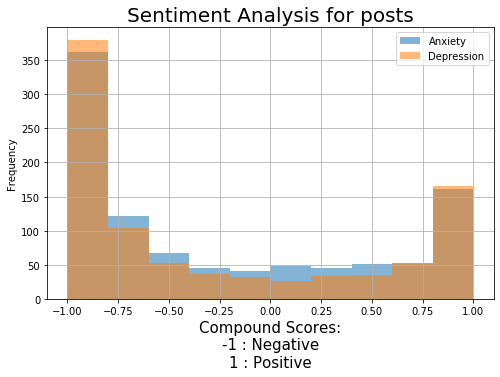

In [41]:
# Plot a histogram to visualize the sentiment final scores

final.groupby('subreddit')['compound_score'].plot(kind='hist',grid=True,stacked=True,alpha=0.55,figsize=(8,5));
plt.legend(['Anxiety','Depression'])
plt.title('Sentiment Analysis for posts', fontsize=20)
plt.xlabel('Compound Scores:\n-1 : Negative\n1 : Positive', fontsize=15);

From above histogram we can see that maximum posts in both subreddits, most posts fall into **negative** category, however, there are few posts which are also **positive**.

This kind of sentiment analyses will not be ideal, since, it doesn't take into account all the words together.
It just calculates the scoring based on individual words which is not an appropriate way.

For example: <br>
Below text from our sample has an compound score of **0.95**, which indicates that this is positive post.<br>
_"Anyone else feel like an extremely confident talker in person but have horrible anxiety over making/getting phone calls?"_

In [42]:
# Printing a sample row with positive sentiment , as compound_score > 0.5
final[final['compound_score']==0.95][:1]

,author_fullname,subreddit,title,selftext,text,clean_data,compound_score
21,t2_hlgp5,0,Anyone else feel like an extremely confident t...,I have never really felt a lack of confidence ...,Anyone else feel like an extremely confident t...,anyone else feel like extremely confident talk...,0.95


# Modeling : Developing the model

Before starting with developing model, let's calculate our baseline accuracy.

The created model's performance should be better than this baseline accuracy.

## Baseline accuracy

In [43]:
# Determing the baseline accuracy
final['subreddit'].value_counts(normalize=True)

0    0.521444
1    0.478556
Name: subreddit, dtype: float64

In [44]:
print("The baseline accuracy is: {}".format(final['subreddit'].value_counts(normalize=True)[0]))

The baseline accuracy is: 0.5214435146443515


**I would be creating & evaluating the below combination of Vectorizers & Models:**
    
1. Count Vectorizer/Tf-idf vectorizer + Naive Bayes model (with default parameters)
2. Lemmatizer + Count Vectorizer/Tf-idf vectorizer + Naive Bayes model (Gridsearch best parameters)
3. Lemmatizer + Count Vectorizer/Tf-idf vectorizer + Logistic Regression model (Gridsearch best parameters)

### Model 1: Naive Bayes model (with default parameters)

I will be checking the performance of 2 vectorizers with Naive Bayes model:
1. Count Vectorizer
2. Tf-idf vectorizer

In [45]:
# Create our target and feature variables

# feature variable
X = final['clean_data']

# Target variable
y = final['subreddit']

In [46]:
# Split our data into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    stratify=y)

In [47]:
# Instantiate our CountVectorizer.
cvec_naive = CountVectorizer(stop_words='english')

# Instantiate our TfidfVectorizer.
tvec_naive = TfidfVectorizer(stop_words='english')

In [48]:
# Fit our CountVectorizer on the training data and transform training data. (Count Vectorizer)
X_train_cvec = pd.DataFrame(cvec_naive.fit_transform(X_train).todense(),
                            columns=cvec_naive.get_feature_names())


# Create a dataframe for the distribution of words in training data (Count Vectorizer)
X_train_cvec_words = pd.DataFrame(X_train_cvec.sum(axis=0),
                                  columns=['total']).sort_values('total', ascending=False)

#Check the created dataframe
X_train_cvec_words.head()

,total
like,1755
feel,1533
anxiety,1193
know,1140
want,854


In [49]:
# Fit our TfidfVectorizer on the training data and transform training data. (Tf-idf Vectorizer)
X_train_tvec = pd.DataFrame(tvec_naive.fit_transform(X_train).todense(),
                            columns=tvec_naive.get_feature_names())

# Create a dataframe for the distribution of words in training data (Tf-idf Vectorizer)
X_train_tvec_words = pd.DataFrame(X_train_tvec.sum(axis=0),
                                  columns=['total']).sort_values('total', ascending=False)

#Check the created dataframe
X_train_tvec_words.head()

,total
feel,64.526930
like,62.957091
anxiety,58.234459
know,45.763420
want,39.889467


In [50]:
print("There are {} words in the training data using Count Vectorizer.".format(X_train_cvec_words.shape[0]))
print("There are {} words in the training data using Tf-idf vectorizer.".format(X_train_tvec_words.shape[0]))

There are 9691 words in the training data using Count Vectorizer.
There are 9691 words in the training data using Tf-idf vectorizer.


#### Plot the top 30 words in training set as identified by :
Count Vectorizer and <br>
Tf-idf vectorizer

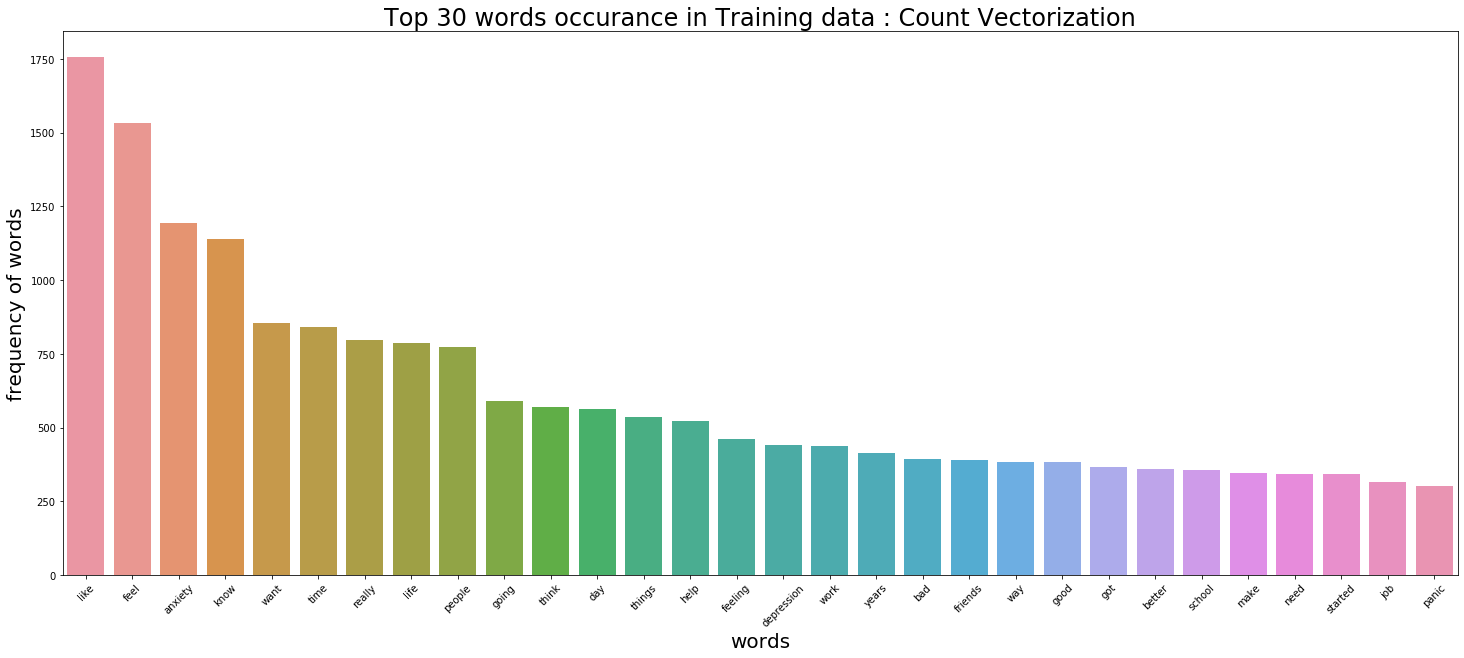

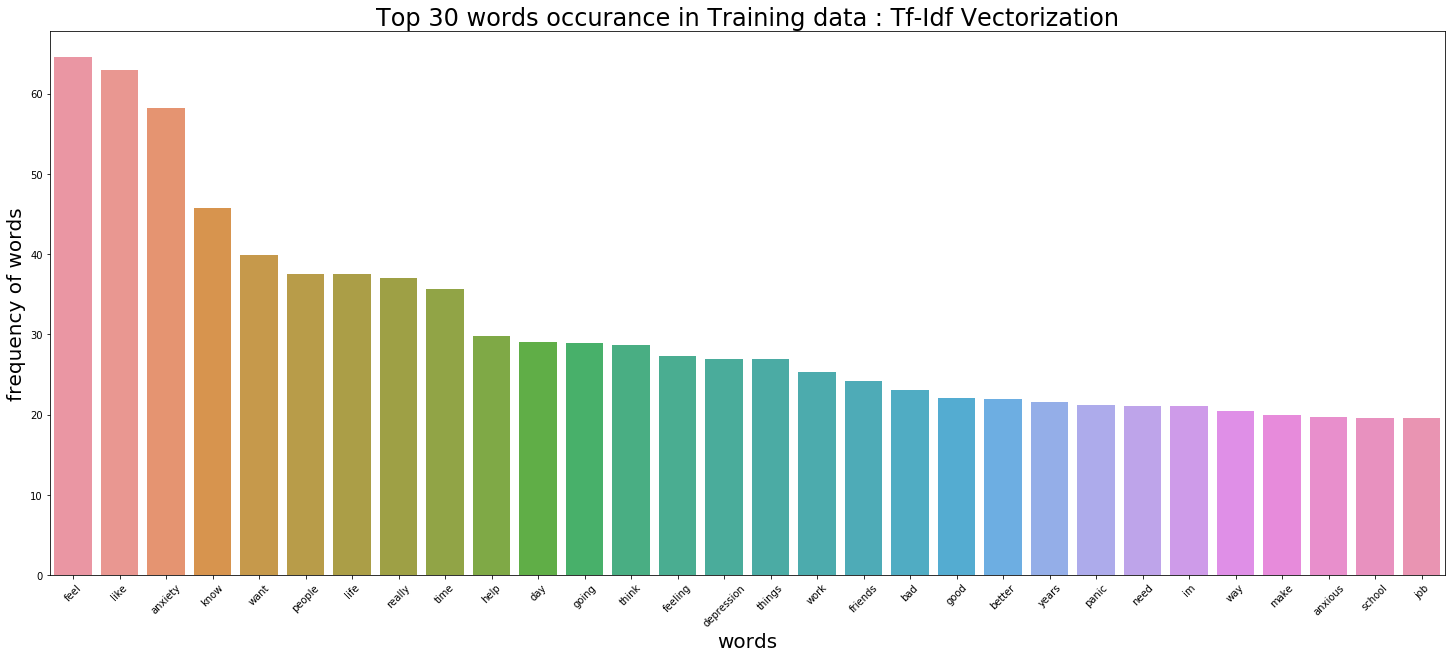

In [51]:
# Plot the top 30 words occurance in Training data : Count Vectorization
fig = plt.figure(figsize=(25,10))
ax = sns.barplot(y='total', x=X_train_cvec_words[:30].index, data=X_train_cvec_words[:30],)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);
ax.set_xlabel("words",fontsize=20)
ax.set_ylabel("frequency of words",fontsize=20)
ax.set_title("Top 30 words occurance in Training data : Count Vectorization",fontsize=24);
plt.show()

# Plot the top 30 words occurance in Training data : Tf-Idf Vectorization
fig = plt.figure(figsize=(25,10))
ax = sns.barplot(y='total', x=X_train_tvec_words[:30].index, data=X_train_tvec_words[:30],)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);
ax.set_xlabel("words",fontsize=20)
ax.set_ylabel("frequency of words",fontsize=20)
ax.set_title("Top 30 words occurance in Training data : Tf-Idf Vectorization",fontsize=24);
plt.show()

There are many common top words as calculated by CountVectorizer & Tf-idf vectorizer.<br>
However, the frequencies of same words is different in both vectorization.

In [52]:
# Transform our testing data with the already-fit CountVectorizer.
X_test_cvec = pd.DataFrame(cvec_naive.transform(X_test).todense(),
                          columns= cvec_naive.get_feature_names())


# Creating a dataframe for distribution of words in testing data : CountVectorizer
X_test_cvec_words = pd.DataFrame(X_test_cvec.sum(axis=0),
                                     columns=['total']).sort_values('total', ascending=False)


In [53]:
# Transform our testing data with the already-fit TfidfVectorizer.
X_test_tvec = pd.DataFrame(tvec_naive.transform(X_test).todense(),
                          columns= tvec_naive.get_feature_names())

# Creating a dataframe for distribution of words in testing data : Tf-idf Vectorizer
X_test_tvec_words = pd.DataFrame(X_test_tvec.sum(axis=0),
                                     columns=['total']).sort_values('total', ascending=False)

#### Plot the top 30 words in test set as identified by :
Count Vectorizer and <br>
Tf-idf vectorizer

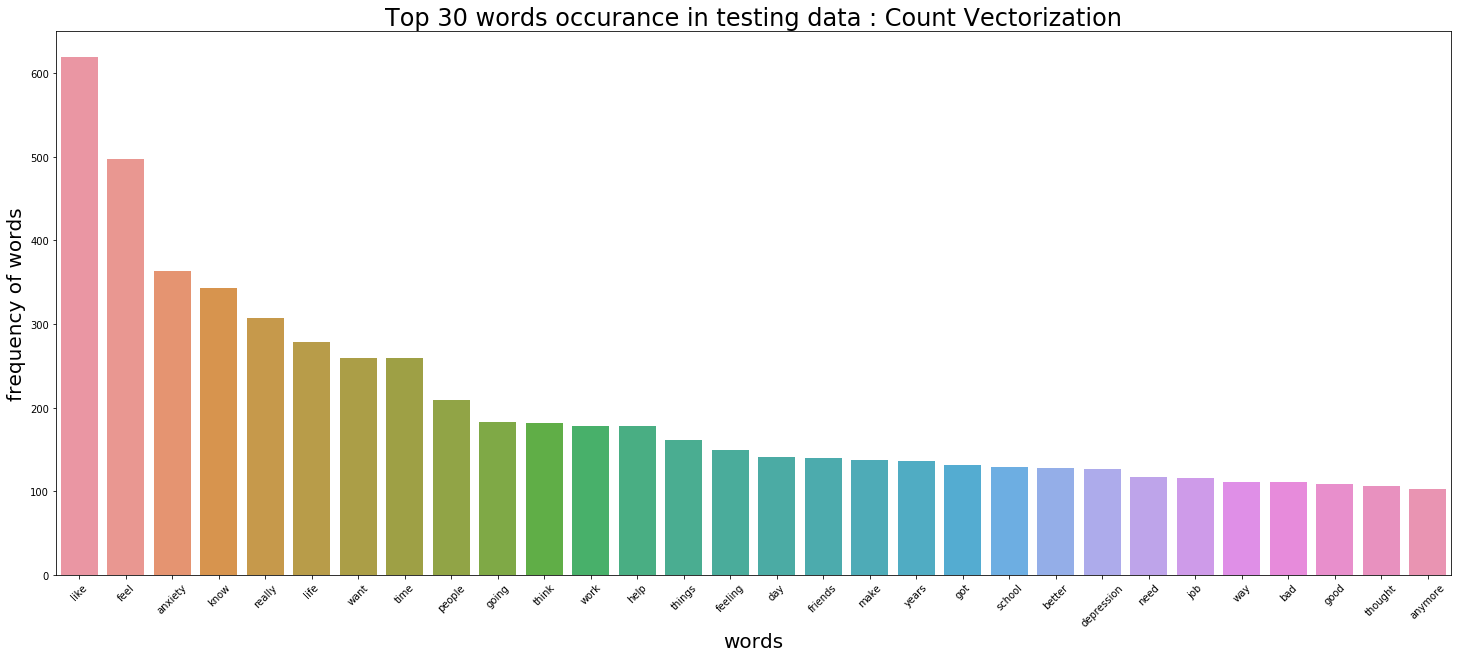

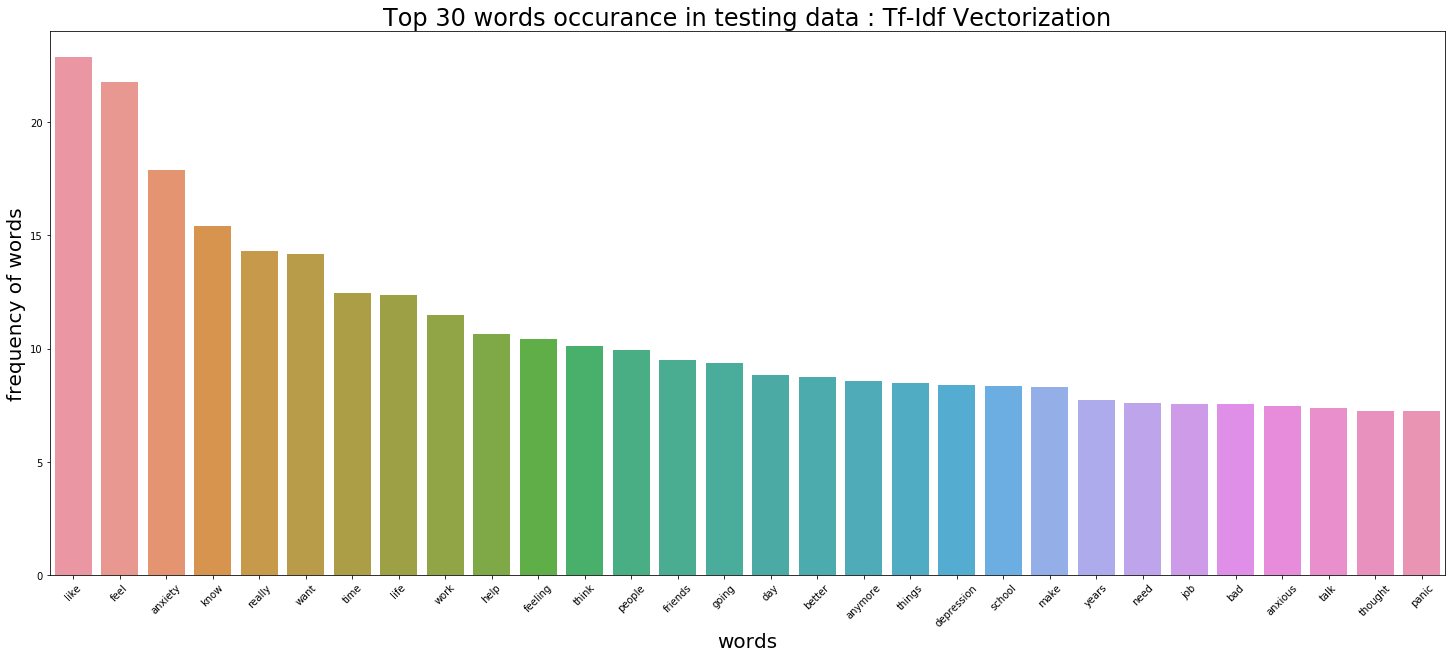

In [54]:
# Plot the top 30 words occurance in testing data : Count Vectorization
fig = plt.figure(figsize=(25,10))
ax = sns.barplot(y='total', x=X_test_cvec_words[:30].index, data=X_test_cvec_words[:30],)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);
ax.set_xlabel("words",fontsize=20)
ax.set_ylabel("frequency of words",fontsize=20)
ax.set_title("Top 30 words occurance in testing data : Count Vectorization",fontsize=24);
plt.show()

# Plot the top 30 words occurance in testing data : Tf-Idf Vectorization
fig = plt.figure(figsize=(25,10))
ax = sns.barplot(y='total', x=X_test_tvec_words[:30].index, data=X_test_tvec_words[:30],)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);
ax.set_xlabel("words",fontsize=20)
ax.set_ylabel("frequency of words",fontsize=20)
ax.set_title("Top 30 words occurance in testing data : Tf-Idf Vectorization",fontsize=24);
plt.show()

#### Fitting the NaiveBayes model.

In [55]:
# Instantiate our model for CountVectorization !
nb_cvec = MultinomialNB()

# Instantiate our model for Tf-idf vectorization!
nb_tvec = MultinomialNB()

In [56]:
# Fit our model for CountVectorization !!
model_cvec = nb_cvec.fit(X_train_cvec, y_train)

# Fit our model for Tf-idf vectorization!!
model_tvec = nb_tvec.fit(X_train_tvec, y_train)

In [57]:
# Score our model on the training set (Count-Vectorizer).
print("The model accuracy on training data with Count-vectorization is: \n{}".format(model_cvec.score(X_train_cvec, y_train)))

# Score our model on the training set (Tf-Idf-Vectorizer).
print("\nThe model accuracy on training data with Tf-idf vectorization is: \n{}".format(model_tvec.score(X_train_tvec, y_train)))

The model accuracy on training data with Count-vectorization is: 
0.9546722454672245

The model accuracy on training data with Tf-idf vectorization is: 
0.9602510460251046


In [58]:
# Score our model on the testing set (Count-Vectorizer).
print("The baseline accuracy on testing data with Count-vectorization is: \n{}".format(model_cvec.score(X_test_cvec, y_test)))

# Score our model on the testing set (Tf-Idf-Vectorizer).
print("\nThe baseline accuracy on testing data with Tf-idf vectorization is: \n{}".format(model_tvec.score(X_test_tvec, y_test)))

The baseline accuracy on testing data with Count-vectorization is: 
0.8451882845188284

The baseline accuracy on testing data with Tf-idf vectorization is: 
0.8326359832635983


The above model seems to be **overfitting** (for both CountVectorizer & Tf-idf Vectorizer) since, there is huge different between training data & testing data accuracy. <br>
Therefore, we will be using pipeline for tuning of parameters.

**I will be storing each model's metrics into a list for reference**

In [59]:
# Store the training data & testing data scores in individual lists.
train_scores = [model_cvec.score(X_train_cvec, y_train),model_tvec.score(X_train_tvec, y_train)]
test_scores = [model_cvec.score(X_test_cvec, y_test),model_tvec.score(X_test_tvec, y_test)]

### Decide between lemmatizer and stemmer

In [60]:
# Defining the function to lemmatize and stem the already cleaned data

def lemmatizing(raw_data):
    
    # Instantiate Lemmatizer.
    lemm = WordNetLemmatizer()
    
    tokens = raw_data.lower().split()

    # Create lemma words
    lemmed_words = [lemm.lemmatize(i) for i in tokens]
    
    return(" ".join(lemmed_words))

# Create a stemmer function
def stemming(raw_data):
    
    # Instantiate Stemmer.
    p_stemmer = PorterStemmer()

    # 3. Convert to lower case, split into individual words.
    tokens = raw_data.lower().split()

    # Create stem words
    stem_words = [p_stemmer.stem(i) for i in tokens]
    
    return(" ".join(stem_words))

In [61]:
# Create an empty list to store the lemmatized data
lem_test = []

# iterate through each row of cleaned data and lemmatize
for row in final.clean_data:
    # Call the function to lemmatize
    lem_test.append(lemmatizing(row))

In [62]:
# Create an empty list to store the stemmed data
stem_test = []

# iterate through each row of cleaned data and stem
for row in final.clean_data:
    # Call the function to stem
    stem_test.append(stemming(row))


In [63]:
# To see how the words are affected, let's print only first 2 lines.

for index in range(0,2):
    # Print the actual text line
    print("Actual:\n",clean_data[index])
    
    # Print the lemmatized text lines
    print("\nlemma:\n",lem_test[index])
    
    # Print the stemmed text lines
    print("\nstemmed:\n",stem_test[index])
    print("\n-------------------------------------------------------------------------------")
    

Actual:
 fuck company events make speak front everyone

lemma:
 fuck company event make speak front everyone

stemmed:
 fuck compani event make speak front everyon

-------------------------------------------------------------------------------
Actual:
 depression anxiety together worst depression makes want stay bed sleep time always super tired purposely overloading body sugar caffeine time though anxiety makes stay way longer constantly thinking cringing panicking internally event personal life work scenario could handled better two issues mix together like oil water like bleach ammonia feel like never win

lemma:
 depression anxiety together worst depression make want stay bed sleep time always super tired purposely overloading body sugar caffeine time though anxiety make stay way longer constantly thinking cringing panicking internally event personal life work scenario could handled better two issue mix together like oil water like bleach ammonia feel like never win

stemmed:
 dep

**Lemmatization Vs Stemming**

Lemmatization reduces the words in a normal/sensible way than Stemmer.
For example: **"everyone"** in first line.<br>
**everyone** is kept as **"everyone"** in lemmatization. Whereas, stemmer reduced it to **"everyon"**.<br>

Since, we are dealing with people's text, I would prefer to use **lemmatizer**.

In [64]:
# Saving the lemmatized data  to the dataframe
final['cleaned_text'] = lem_test

/Users/priya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [65]:
# Save the final dataframe 
final.to_csv('../data/final_data.csv',index=False)

### Model 2: Naive Bayes model (with GridSearch best parameters) , with CountVectorizer
Since, the earlier model was overfitted, here, I would use GridSearch to search for best paramaters and then fit my model as per these best params.

Again, this model will be in addition to:<br> CountVectorization & <br>Tf-idf Vectorization.

In [66]:
# Let's create our features and target variables again
X = final['cleaned_text']
y = final['subreddit']

In [67]:
# Split our lemmatized data into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    stratify=y)

In [68]:
# Create a pipeline
pipe = Pipeline ([
                  ('cvec', CountVectorizer(stop_words='english')),
                  ('nb' , MultinomialNB())
                ])

In [69]:
# Define the pipeline parameters to grid-search for
pipe_params = {
    'cvec__max_features': [100,500,1000],
    'cvec__min_df': [2,3],
    'cvec__max_df': [.2,.5,.9],
    'cvec__ngram_range': [(1,1),(1,2)]
}

In [70]:
# Grid searching
gs = GridSearchCV(pipe, param_grid=pipe_params, cv=3)

# Fit the X_train & y_train to the gridsearch
gs.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                            

In [71]:
# Dispply the best score & best paramaters as identified by the grid search
print("The best score for CountVectorizer + Naive Bayes model (with grid search) is: \n{}".format(gs.best_score_))
print("\nThe best params identified by grid search are: \n{}".format(gs.best_params_))

The best score for CountVectorizer + Naive Bayes model (with grid search) is: 
0.8472803347280334

The best params identified by grid search are: 
{'cvec__max_df': 0.5, 'cvec__max_features': 1000, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 2)}


In [72]:
# Storing the model's paramaters in a list

# Storing the parameters in param list
params = [0,0,gs.best_params_]

# Storing the best score in best_score list
best_score = [0,0,gs.best_score_]

In [73]:
# Accuracy of models with best parameters
print("The training data accuracy of NB model with best paramaters:\n{}".format(gs.score(X_train, y_train)))
print("\nThe testing data accuracy of NB model with best paramaters:\n{}".format(gs.score(X_test, y_test)))

The training data accuracy of NB model with best paramaters:
0.891213389121339

The testing data accuracy of NB model with best paramaters:
0.8598326359832636


In [74]:
# Storing the training set scores in a list
train_scores.append(gs.score(X_train, y_train))

# Storing the testing set scores in a list
test_scores.append(gs.score(X_test, y_test))

In [75]:
# Generate our predictions for the model with the best fitted params
predictions_gs_cvec = gs.predict(X_test)

In [76]:
# Generate a confusion matrix.
pd.DataFrame(confusion_matrix(y_test,predictions_gs_cvec),
            columns=['Predicted Anxiety','Predicted Depression'],
            index=['Actual Anxiety', 'Actual Depression'])

,Predicted Anxiety,Predicted Depression
Actual Anxiety,212,37
Actual Depression,30,199


In [77]:
# Print the confusion matrix

tn, fp, fn, tp = confusion_matrix(y_test, predictions_gs_cvec).ravel()

print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 212
False Positives: 37
False Negatives: 30
True Positives: 199


In [78]:
# Calculate senstivity and specificity for the model
senstivity = tp/(tp+fn)
specificity = tn/(tn+fp)

print("Sensitivity score for this model is: \n{}".format(senstivity))
print("Specificity score for this model is: \n{}".format(specificity))

Sensitivity score for this model is: 
0.868995633187773
Specificity score for this model is: 
0.8514056224899599


In [79]:
# Storing the model's paramaters in a list

# Storing the number of FP(False positives) the list
fp_score = [0,0,fp]

# Storing the number of FN(False negatives) the list
fn_score = [0,0,fn]

# Storing the senstivity score to the list
senstivity_score = [0,0,senstivity]

# Storing the specificity score to the list
specificity_score = [0,0,specificity]

In [80]:
# Print the classification report

target=['anxiety','depression']
print(classification_report(y_test, predictions_gs_cvec,target_names=target))

              precision    recall  f1-score   support

     anxiety       0.88      0.85      0.86       249
  depression       0.84      0.87      0.86       229

    accuracy                           0.86       478
   macro avg       0.86      0.86      0.86       478
weighted avg       0.86      0.86      0.86       478



#### Creating a function for plotting of ROC plots.

In [81]:
# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))

# Function to plot the ROC curve
def roc_plot(fpr_values,tpr_values,pred_df):
    # Create figure.
    plt.figure(figsize = (10,7))

    # Create threshold values. (Dashed red line in image.)
    thresholds = np.linspace(0, 1, 200)    

    # Plot ROC curve.
    plt.plot(fpr_values, # False Positive Rate on X-axis
             tpr_values, # True Positive Rate on Y-axis
             label='ROC Curve')

    # Plot baseline. (Perfect overlap between the two populations.)
    plt.plot(np.linspace(0, 1, 200),
             np.linspace(0, 1, 200),
             label='baseline',
             linestyle='--')

    # Label axes.
    #plt.title(f'ROC Curve with AUC = {round(roc_auc_score(pred_df['true_values'],pred_df['pred_probs']),3)}', fontsize=22)
    plt.title('ROC Curve with AUC = {}'.format(round(roc_auc_score(pred_df['true_values'],pred_df['pred_probs']),3)), fontsize=22)
    plt.ylabel('Sensitivity', fontsize=18)
    plt.xlabel('1 - Specificity', fontsize=18)

    # Create legend.
    plt.legend(fontsize=16);

In [82]:
# Generate the probalities of predictions for above model
pred_proba_cvec = [i[1] for i in gs.predict_proba(X_test)]

In [83]:
# Create a dataframe with the true values and probablities
pred_df_cvec = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba_cvec})

In [84]:
# Calculate roc score
roc_score = roc_auc_score(pred_df_cvec['true_values'], pred_df_cvec['pred_probs'])
print("The AUC for CountVectorizer + NaiveBayes model is \n{}".format(roc_score))

The AUC for CountVectorizer + NaiveBayes model is 
0.9116465863453815


In [85]:
# Store the ROC score to the list to keep a track of scores of different models
roc = [0,0,round(roc_score,3)]

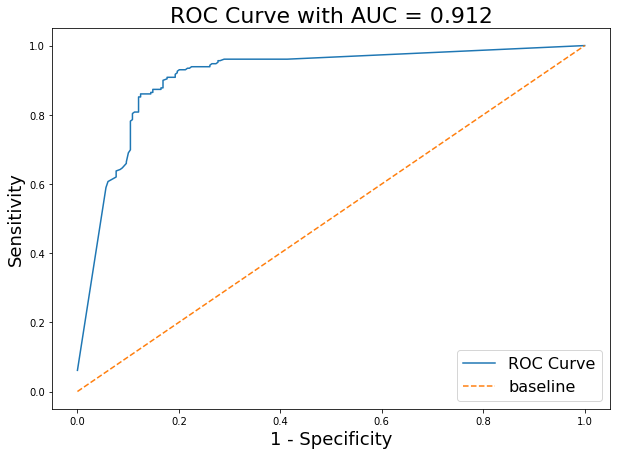

In [86]:
# Calculate snsitivity & 1-specificity for each threshold between 0 and 1.

# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)  

# Call the function to create trure_positive_rate values
tpr_values = [TPR(pred_df_cvec, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Call the function to create false_positive_rate values
fpr_values = [FPR(pred_df_cvec, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot the graph
roc_plot(fpr_values,tpr_values,pred_df_cvec)

### Model 2 contd...
### Naive Bayes model (with GridSearch best parameters) , with Tf-idf Vectorizer

In [87]:
# Create the pipeline
pipe_tvec = Pipeline ([
                  ('tvec', TfidfVectorizer(stop_words='english')),
                  ('nb' , MultinomialNB())
                ])

In [88]:
# Define the pipeline parameters to grid-search for
pipe_tvec_params = {
    'tvec__max_features': [100,500,1000],
    'tvec__min_df': [2,3],
    'tvec__max_df': [.2,.5,.9],
    'tvec__ngram_range': [(1,1),(1,2)]
}

In [89]:
# Grid search for best params
gs_tvec = GridSearchCV(pipe_tvec, param_grid=pipe_tvec_params, cv=3)

# Fit the X_train & y_train to the pipeline
gs_tvec.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('tvec',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                          

In [90]:
print("Best score for Tf-idf Vectorizer + Naive Bayes model (with grid search) is: \n{}".format(gs_tvec.best_score_))
print("\nBest params for Tf-idf Vectorizer + Naive Bayes model (with grid search) are: \n{}".format(gs_tvec.best_params_))

Best score for Tf-idf Vectorizer + Naive Bayes model (with grid search) is: 
0.8458856345885635

Best params for Tf-idf Vectorizer + Naive Bayes model (with grid search) are: 
{'tvec__max_df': 0.9, 'tvec__max_features': 1000, 'tvec__min_df': 2, 'tvec__ngram_range': (1, 2)}


In [91]:
# Store the params and best score to the list
params.append(gs_tvec.best_params_)
best_score.append(gs_tvec.best_score_)

In [92]:
# Accuracy of models with best parameters
print("The accuracy for training set is: \n{}".format(gs_tvec.score(X_train, y_train)))
print("\nThe accuracy for testing set is: \n{}".format(gs_tvec.score(X_test, y_test)))

The accuracy for training set is: 
0.899581589958159

The accuracy for testing set is: 
0.8514644351464435


In [93]:
# Storing the testing and training set scores to the list

train_scores.append(gs_tvec.score(X_train, y_train))
test_scores.append(gs_tvec.score(X_test, y_test))

In [94]:
# Generate our predictions!
predictions_gs_tvec = gs_tvec.predict(X_test)

In [95]:
# Generate a confusion matrix.
pd.DataFrame(confusion_matrix(y_test,predictions_gs_tvec),
            columns=['Predicted Anxiety','Predicted Depression'],
            index=['Actual Anxiety', 'Actual Depression'])

,Predicted Anxiety,Predicted Depression
Actual Anxiety,211,38
Actual Depression,33,196


In [96]:
# Print the confusion matrix

tn, fp, fn, tp = confusion_matrix(y_test, predictions_gs_tvec).ravel()

print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 211
False Positives: 38
False Negatives: 33
True Positives: 196


In [97]:
# Calculate senstivity and specificity for the model
senstivity = tp/(tp+fn)
specificity = tn/(tn+fp)

print("Sensitivity score for this model is: \n{}".format(senstivity))
print("Specificity score for this model is: \n{}".format(specificity))

Sensitivity score for this model is: 
0.8558951965065502
Specificity score for this model is: 
0.8473895582329317


In [98]:
# Storing the model's paramaters in a list

# Storing the number of FP(False positives) the list
fp_score.append(fp)

# Storing the number of FN(False negatives) the list
fn_score.append(fn)

# Storing the senstivity score to the list
senstivity_score.append(senstivity)

# Storing the specificity score to the list
specificity_score.append(specificity)

In [99]:
# Print the classification report for the model
target=['anxiety','depression']
print(classification_report(y_test, predictions_gs_tvec,target_names=target))

              precision    recall  f1-score   support

     anxiety       0.86      0.85      0.86       249
  depression       0.84      0.86      0.85       229

    accuracy                           0.85       478
   macro avg       0.85      0.85      0.85       478
weighted avg       0.85      0.85      0.85       478



In [100]:
# Generate the probalities of predictions
pred_proba_tvec = [i[1] for i in gs_tvec.predict_proba(X_test)]

# Create a dataframe with the true values and probablities
pred_df_tvec = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba_tvec})

In [101]:
# Calculate score.
roc_score = roc_auc_score(pred_df_tvec['true_values'], pred_df_tvec['pred_probs'])

print("The AUC for Tf-idf Vectorizer + NaiveBayes model is \n{}".format(roc_score))

The AUC for Tf-idf Vectorizer + NaiveBayes model is 
0.9138913733536768


In [102]:
# update the ROC score to the list to keep a track of scores of different models
roc.append(round(roc_score,3))

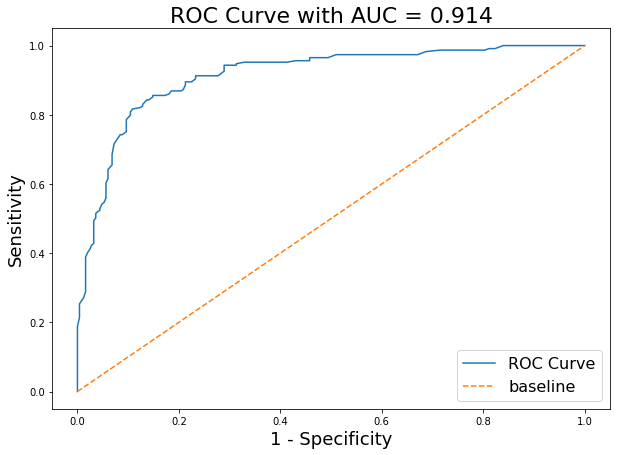

In [103]:
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.

# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)  

# Generate the true_positive_rate values
tpr_values = [TPR(pred_df_tvec, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Generate the false_positive_rate values
fpr_values = [FPR(pred_df_tvec, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot the ROC 
roc_plot(fpr_values,tpr_values,pred_df_tvec)

## Model 3: Count Vectorization + Logistic regression

**Lets compare the performance of our Naive Bayes model with optimised Logistic Regression model.**

In [104]:
# Create a pipeline

pipe_cvec_logreg = Pipeline ([
                  ('cvec', CountVectorizer(stop_words='english')),
                  ('lr' , LogisticRegression())
                ])

In [105]:
# Define the pipeline parameters to grid-search for
pipe_params ={
    'cvec__max_features': [1500,2000],
    'cvec__min_df': [2,3],
    'cvec__max_df': [.5,.8],
    'cvec__ngram_range': [(1,1),(1,2)],
    'lr__C' : np.logspace(-4, 4, 10),
    'lr__penalty' : ['l1','l2']}
                            

In [106]:
# Grid search the paramaters
gs_cvec_logreg = GridSearchCV(pipe_cvec_logreg, param_grid=pipe_params, cv=3, n_jobs=-1)

# Fir our X_train & y_train to the model
gs_cvec_logreg.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                            

In [107]:
print("The best score for CountVectorizer+LogisticRegression Model is: \n{}".format(gs_cvec_logreg.best_score_))
print("\nThe best paramas for model are: \n{}".format(gs_cvec_logreg.best_params_))

The best score for CountVectorizer+LogisticRegression Model is: 
0.8668061366806137

The best paramas for model are: 
{'cvec__max_df': 0.5, 'cvec__max_features': 2000, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 2), 'lr__C': 0.046415888336127774, 'lr__penalty': 'l2'}


In [108]:
# Storing the paramaters (params & best score) in a list
params.append(gs_cvec_logreg.best_params_)
best_score.append(gs_cvec_logreg.best_score_)

In [109]:
# Accuracy of models with best parameters
print("The train data accuracy using CountVectorizer + LogisticRegression model with best paramaters:\n{}".
      format(gs_cvec_logreg.score(X_train, y_train)))

print("\nThe test data accuracy using CountVectorizer + LogisticRegression model model with best paramaters:\n{}".
      format(gs_cvec_logreg.score(X_test, y_test)))

The train data accuracy using CountVectorizer + LogisticRegression model with best paramaters:
0.9483960948396095

The test data accuracy using CountVectorizer + LogisticRegression model model with best paramaters:
0.8744769874476988


In [110]:
# Storing the scores in a list
train_scores.append(gs_cvec_logreg.score(X_train, y_train))
test_scores.append(gs_cvec_logreg.score(X_test, y_test))

In [111]:
# Generate our predictions!
predictions_gs_cvec_logreg = gs_cvec_logreg.predict(X_test)

In [112]:
# Generate a confusion matrix.
pd.DataFrame(confusion_matrix(y_test,predictions_gs_cvec_logreg),
            columns=['Predicted Anxiety','Predicted Depression'],
            index=['Actual Anxiety', 'Actual Depression'])

,Predicted Anxiety,Predicted Depression
Actual Anxiety,212,37
Actual Depression,23,206


In [113]:
# Print the confusion matrix

tn, fp, fn, tp = confusion_matrix(y_test, predictions_gs_cvec_logreg).ravel()

print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 212
False Positives: 37
False Negatives: 23
True Positives: 206


In [114]:
# Calculate senstivity and specificity for the model
senstivity = tp/(tp+fn)
specificity = tn/(tn+fp)

print("Sensitivity score for this model is: \n{}".format(senstivity))
print("Specificity score for this model is: \n{}".format(specificity))

Sensitivity score for this model is: 
0.8995633187772926
Specificity score for this model is: 
0.8514056224899599


In [115]:
# Storing the model's paramaters in a list

# Storing the number of FP(False positives) the list
fp_score.append(fp)

# Storing the number of FN(False negatives) the list
fn_score.append(fn)

# Storing the senstivity score to the list
senstivity_score.append(senstivity)

# Storing the specificity score to the list
specificity_score.append(specificity)

In [116]:
# Print classification report
target=['anxiety','depression']
print(classification_report(y_test, predictions_gs_cvec_logreg,target_names=target))

              precision    recall  f1-score   support

     anxiety       0.90      0.85      0.88       249
  depression       0.85      0.90      0.87       229

    accuracy                           0.87       478
   macro avg       0.87      0.88      0.87       478
weighted avg       0.88      0.87      0.87       478



In [117]:
# Generate the probalities of predictions
pred_gs_cvec_logreg = [i[1] for i in gs_cvec_logreg.predict_proba(X_test)]

# Create a dataframe with the true values and probablities
pred_df_cvec_logreg = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_gs_cvec_logreg})

In [118]:
# Calculate score.
roc_score = roc_auc_score(pred_df_cvec_logreg['true_values'], pred_df_cvec_logreg['pred_probs'])

print("The AUC for CountVectorizer + LogisticRegression model is \n{}".format(roc_score))

The AUC for CountVectorizer + LogisticRegression model is 
0.9418459865663528


In [119]:
# update the ROC score to the list to keep a track of scores of different models
roc.append(round(roc_score,3))

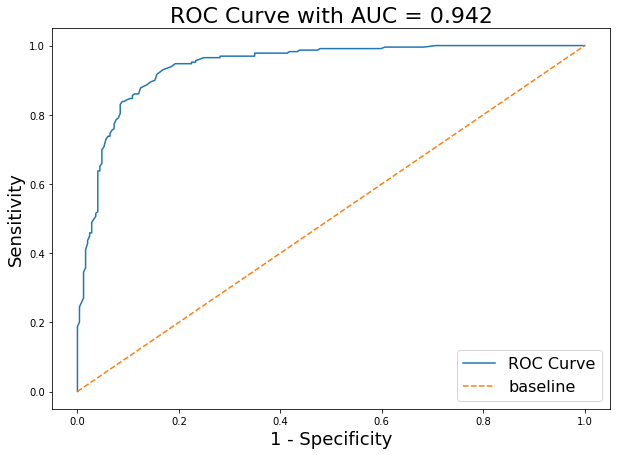

In [120]:
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.

# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)  

# Generate true_positive_rate values
tpr_values = [TPR(pred_df_cvec_logreg, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Generate false_positive_rate values
fpr_values = [FPR(pred_df_cvec_logreg, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve
roc_plot(fpr_values,tpr_values,pred_df_cvec_logreg)

### Model 3 contd...
### Tf-idf Vectorization + Logistic regression

In [121]:
# Create a pipeline
pipe_tvec_logreg = Pipeline ([
                  ('tvec', TfidfVectorizer(stop_words='english')),
                  ('lr' , LogisticRegression())
                ])

In [122]:
# Define the pipeline parameters to grid-search for
pipe_params = {
    'tvec__max_features': [1500,2000],
    'tvec__min_df': [2,3],
    'tvec__max_df': [.5,.9],
    'tvec__ngram_range': [(1,1),(1,2)],
    'lr__C' : np.logspace(-4, 4, 10),
   'lr__penalty' : ['l1','l2']
}

In [123]:
# Grid search
gs_tvec_logreg = GridSearchCV(pipe_tvec_logreg, param_grid=pipe_params, cv=3)

# Fit the X_train and y_train to model
gs_tvec_logreg.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('tvec',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                          

In [124]:
print("The best score for Tf-idf + LogisticRegression model is: \n{}".format(gs_tvec_logreg.best_score_))
print("\nThe best params for model are: \n{}".format(gs_tvec_logreg.best_params_))

The best score for Tf-idf + LogisticRegression model is: 
0.8807531380753139

The best params for model are: 
{'lr__C': 0.3593813663804626, 'lr__penalty': 'l2', 'tvec__max_df': 0.9, 'tvec__max_features': 2000, 'tvec__min_df': 2, 'tvec__ngram_range': (1, 2)}


In [125]:
# Storing the paramaters in a list
params.append(gs_tvec_logreg.best_params_)
best_score.append(gs_tvec_logreg.best_score_)

In [126]:
# Accuracy of models with best parameters
print("The train data accuracy using Tf-idfVectorizer + LogisticRegression model with best paramaters:\n{}".
      format(gs_tvec_logreg.score(X_train, y_train)))

print("\nThe test data accuracy using Tf-idfVectorizer + LogisticRegression model model with best paramaters:\n{}".
      format(gs_tvec_logreg.score(X_test, y_test)))

The train data accuracy using Tf-idfVectorizer + LogisticRegression model with best paramaters:
0.9351464435146444

The test data accuracy using Tf-idfVectorizer + LogisticRegression model model with best paramaters:
0.8619246861924686


In [127]:
# Storing the scores in a list
train_scores.append(gs_tvec_logreg.score(X_train, y_train))
test_scores.append(gs_tvec_logreg.score(X_test, y_test))

In [128]:
# Generate our predictions!
predictions_gs_tvec_logreg = gs_tvec_logreg.predict(X_test)

In [129]:
# Generate a confusion matrix.
pd.DataFrame(confusion_matrix(y_test,predictions_gs_tvec_logreg),
            columns=['Predicted Anxiety','Predicted Depression'],
            index=['Actual Anxiety', 'Actual Depression'])

,Predicted Anxiety,Predicted Depression
Actual Anxiety,212,37
Actual Depression,29,200


In [130]:
# Print the confusion matrix

tn, fp, fn, tp = confusion_matrix(y_test, predictions_gs_tvec_logreg).ravel()

print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 212
False Positives: 37
False Negatives: 29
True Positives: 200


In [131]:
# Calculate senstivity and specificity for the model
senstivity = tp/(tp+fn)
specificity = tn/(tn+fp)

print("Sensitivity score for this model is: \n{}".format(senstivity))
print("Specificity score for this model is: \n{}".format(specificity))

Sensitivity score for this model is: 
0.8733624454148472
Specificity score for this model is: 
0.8514056224899599


In [132]:
# Storing the model's paramaters in a list

# Storing the number of FP(False positives) the list
fp_score.append(fp)

# Storing the number of FN(False negatives) the list
fn_score.append(fn)

# Storing the senstivity score to the list
senstivity_score.append(senstivity)

# Storing the specificity score to the list
specificity_score.append(specificity)

In [133]:
# Print classification report
target=['anxiety','depression']
print(classification_report(y_test, predictions_gs_tvec_logreg,target_names=target))

              precision    recall  f1-score   support

     anxiety       0.88      0.85      0.87       249
  depression       0.84      0.87      0.86       229

    accuracy                           0.86       478
   macro avg       0.86      0.86      0.86       478
weighted avg       0.86      0.86      0.86       478



In [134]:
# Generate the probailities of predictions
pred_proba_tvec_logreg = [i[1] for i in gs_tvec_logreg.predict_proba(X_test)]

pred_df_tvec_logreg = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba_tvec_logreg})

In [135]:
# Calculate score.
roc_score = roc_auc_score(pred_df_tvec_logreg['true_values'], pred_df_tvec_logreg['pred_probs'])

print("The AUC for Tf-idf Vectorizer + LogisticRegression model is \n{}".format(roc_score))

The AUC for Tf-idf Vectorizer + LogisticRegression model is 
0.9344101296013749


In [136]:
roc.append(round(roc_score,3))

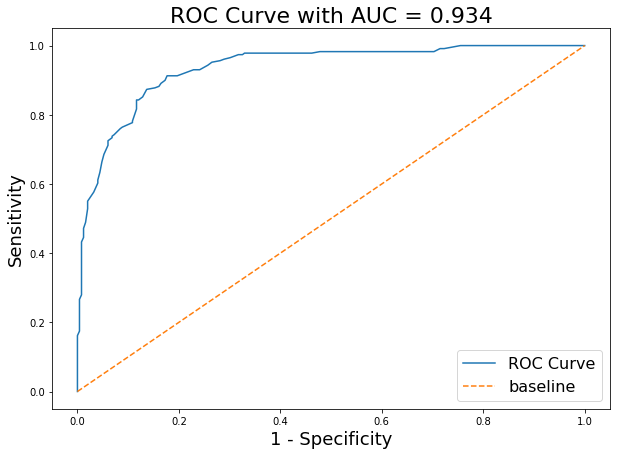

In [137]:
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.

# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)  

# Create a list of true_positive_rate values
tpr_values = [TPR(pred_df_tvec_logreg, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Create a list of false_positive_rate values
fpr_values = [FPR(pred_df_tvec_logreg, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot the ROC curve
roc_plot(fpr_values,tpr_values,pred_df_tvec_logreg)

In [138]:
# Create a dataframe for scores and metrics from all models

final_scores = pd.DataFrame({'train_acc':train_scores,
                             'test_acc':test_scores,
                             'best_score':best_score,
                             'params':params,
                             'auc': roc,
                             'False_positives':fp_score,
                             'False_negatives': fn_score,
                             'senstivity' : senstivity_score,
                             'specificity' : specificity_score
                            },
                           index=['cvecNB','tvecNB','GridcvecNB','GridtvecNB','GridcvecLR', 'GridtvecLR'])

In [139]:
# print the baseline score.
print("The baseline accuracy was: \n{}".format(final['subreddit'].value_counts(normalize=True)[0]))
print("\nAccuracy of all explored models is more than the baseline accuracy......\n")

# Display the scores dataframe
final_scores

The baseline accuracy was: 
0.5214435146443515

Accuracy of all explored models is more than the baseline accuracy......



,train_acc,test_acc,best_score,params,auc,False_positives,False_negatives,senstivity,specificity
cvecNB,0.954672,0.845188,0.000000,0,0.000,0,0,0.000000,0.000000
tvecNB,0.960251,0.832636,0.000000,0,0.000,0,0,0.000000,0.000000
GridcvecNB,0.891213,0.859833,0.847280,"{'cvec__max_df': 0.5, 'cvec__max_features': 10...",0.912,37,30,0.868996,0.851406
GridtvecNB,0.899582,0.851464,0.845886,"{'tvec__max_df': 0.9, 'tvec__max_features': 10...",0.914,38,33,0.855895,0.847390
GridcvecLR,0.948396,0.874477,0.866806,"{'cvec__max_df': 0.5, 'cvec__max_features': 20...",0.942,37,23,0.899563,0.851406
GridtvecLR,0.935146,0.861925,0.880753,"{'lr__C': 0.3593813663804626, 'lr__penalty': '...",0.934,37,29,0.873362,0.851406


In [140]:
# Save the scores
final_scores.to_csv('../data/scores_1.csv',index=False)

## Conclusion & Recommendation

#### LogisticRegression Vs Naive Bayes

My choice between these models will be **LogisticRegression**. 

Reasons for choosing LogisticRegression:
- _The drop of accuracy between training and testing set is more in LogisticRegression than Naive Bayes, but it is still accpetable as there is not much difference._
- _The **accuracy score** (for testing data) for LogisticRegression model is better than Naive Bayes._
- _The **AreaUnderCurve** is more in LogisticRegression than Naive Bayes._

#### CountVectorizer+LogisticRegression Vs Tf-idfVectorizer+LogisticRegression

My choice will be CountVectorizer+LogisticRegression because:
- _The **AreaUnderCurve** is more in CountVectorizer (0.942) as compared to Tf-idfVectorizer (0.934).
- _The **specificity** is same for both_.
- _The **senstivity** is more for CountVectorizer (~0.9) as compared to Tf-idfVectorizer (0.87). This is supported by the less number of False Negatives (Type2) errors._

So, the selected **final** model will be : **CountVectorizer + LogisticRegression** model.

>**With the help of this classifier model, we will be able to detect that the given post belongs to which subreddit (depression or anxiety).**

**Industry implementation of this classifier:** This classifier will help to understand whether a person has depression or not based on the words used by him/her. Eg: In a psychiatrist session.

And thus, helping to take appropriate measures to help the person.

## Limitations

There are some limitations also to this model:
1. The model is based on only on approx 2000 posts that have been read from Subreddits. This is only 1 source and thus posing limitation on the modeling.
2. Not everyone who has depression, posts or uses Reddit.
3. People are not open or willing to discuss about their depression due to fact that depression is still considered as a social stigma (Some people still link depression to mental illness). 
4. Reddit.com is an American website, therefore, the data is more relevant to American population.
5. Extending the above point, people in different regions have some specific language words. Thus our model, is limited to plain English language. It can't understand/process the local words.
6. The data available on Reddit doesn't have information like Age, thus making it hard to understand if there is any given pattern that leads to depression.